In [1]:
# Импортируем все необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
import sklearn 
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import (
    accuracy_score, confusion_matrix, mean_absolute_error, 
    r2_score, mean_squared_error, precision_score, recall_score
)

## 1. Загрузка данных

#### 1.1 Загрузка данных и разделение столбцов

In [2]:
try:
    ferma_main_df = pd.read_csv('/datasets/ferma_main.csv', sep=';')
    ferma_dad_df = pd.read_csv('/datasets/ferma_dad.csv', sep=';')
    cow_buy_df = pd.read_csv('/datasets/cow_buy.csv', sep=';')
except FileNotFoundError:
    ferma_main_df = pd.read_csv(r"C:\Users\Тадевос\Tadevos\USER\Desktop\Курсы\Модуль 2\Датасеты к проектам\Проект 1 - Линейные модели в МО\ferma_main.csv", sep=';')
    ferma_dad_df = pd.read_csv(r"C:\Users\Тадевос\Tadevos\USER\Desktop\Курсы\Модуль 2\Датасеты к проектам\Проект 1 - Линейные модели в МО\ferma_dad.csv", sep=';')
    cow_buy_df = pd.read_csv(r"C:\Users\Тадевос\Tadevos\USER\Desktop\Курсы\Модуль 2\Датасеты к проектам\Проект 1 - Линейные модели в МО\cow_buy.csv", sep=';')

In [3]:
ferma_main_df.head()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


In [4]:
ferma_main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

In [5]:
ferma_main_df.describe()

,id,"Удой, кг","Сырой протеин, г"
count,634.000000,634.000000,634.000000
mean,317.460568,6187.025237,1922.682965
std,183.096982,1638.401021,182.392548
min,1.000000,5204.000000,1660.000000
25%,159.250000,5751.750000,1772.250000
50%,317.500000,6130.500000,1880.500000
75%,475.750000,6501.000000,2058.750000
max,629.000000,45616.000000,2349.000000


In [6]:
ferma_dad_df.head()

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [7]:
ferma_dad_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [8]:
ferma_dad_df.describe()

,id
count,629.00000
mean,315.00000
std,181.72094
min,1.00000
25%,158.00000
50%,315.00000
75%,472.00000
max,629.00000


In [9]:
cow_buy_df.head()

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


In [10]:
cow_buy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


In [11]:
cow_buy_df.describe()

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
count,20,20,20,20,20,20,20
unique,2,2,2,4,12,12,2
top,РефлешнСоверинг,равнинное,Соверин,Буйный,"3,73","3,074",более_2_лет
freq,11,11,12,8,3,5,15


> **Выводы по первому шагу:**
>
> В первом шаге были проделаны следующие действия: 
>  - загрузка данных;
>  - изучение общей информации о данных.
>
> **После загрузки и изучения данных можно сделать несколько выводов:**
> 1. названия столбцов не соответствуют стандартам python;
> 2. во всех датафреймах нет пропущенных значений;
> 3. некоторые типы данных не соответствуют значениям, а именно в датафреймах **ferma_main_df** и **cow_buy_df**;
> 4. данные тип которых следует изменить написаны через ",", что тоже является ошибкой.

##  2. Предобработка данных

#### 2.1 Переименование столбцов в датафреймах

In [12]:
# Переименование столбцов в ferma_main_df
ferma_main_df.rename(columns={'Удой, кг': 'удой_кг', 'ЭКЕ (Энергетическая кормовая единица)': 'эке', 
                              'Сырой протеин, г': 'сырой_протеин_г', 'Порода': 'порода', 'Тип пастбища': 'тип_пастбища',
                              'СПО (Сахаро-протеиновое соотношение)': 'спо', 'Жирность,%': 'жирность_%', 
                              'порода папы_быка': 'порода_папы_быка','Белок,%': 'белок_%', 
                              'Вкус молока': 'вкус_молока', 'Возраст': 'возраст'}, inplace=True)

In [13]:
ferma_main_df.head()

,id,удой_кг,эке,сырой_протеин_г,спо,порода,тип_пастбища,порода_папы_быка,жирность_%,белок_%,вкус_молока,возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


In [14]:
# Переименование столбцов в ferma_dad_df
ferma_dad_df.rename(columns={'Имя Папы': 'имя_папы'}, inplace=True)

In [15]:
ferma_dad_df.head()

,id,имя_папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [16]:
# Переименование столбцов в cow_buy_df
cow_buy_df.rename(columns={'Порода': 'порода', 'Тип пастбища': 'тип_пастбища',
                               'порода папы_быка': 'порода_папы_быка', 'Имя_папы': 'имя_папы',
                               'Текущая_жирность,%': 'текущая_жирность_%', 
                               'Текущий_уровень_белок,%': 'текущий_уровень_белка_%', 'Возраст': 'возраст'}, inplace=True)

In [17]:
cow_buy_df.head()

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность_%,текущий_уровень_белка_%,возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


#### 2.2 Изменение типа данных

In [18]:
# Изменяем тип данных столбца "эке" на float64
ferma_main_df["эке"] = ferma_main_df["эке"].str.replace(',', '.').astype(float)
# Изменяем тип данных столбца "спо" на float64
ferma_main_df["спо"] = ferma_main_df["спо"].str.replace(',', '.').astype(float)
# Изменяем тип данных столбца "жирность_%" на float64
ferma_main_df["жирность_%"] = ferma_main_df["жирность_%"].str.replace(',', '.').astype(float)
# Изменяем тип данных столбца "белок_%" на float64
ferma_main_df["белок_%"] = ferma_main_df["белок_%"].str.replace(',', '.').astype(float)

In [19]:
# Изменяем тип данных столбца "текущая_жирность_%" на float64
cow_buy_df["текущая_жирность_%"] = cow_buy_df["текущая_жирность_%"].str.replace(',', '.').astype(float)
# Изменяем тип данных столбца "текущий_уровень_белка_%" на float64
cow_buy_df["текущий_уровень_белка_%"] = cow_buy_df["текущий_уровень_белка_%"].str.replace(',', '.').astype(float)

In [20]:
# Убедимся, что типы данных были изменены после проведенных действий
ferma_main_df.info()
cow_buy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                634 non-null    int64  
 1   удой_кг           634 non-null    int64  
 2   эке               634 non-null    float64
 3   сырой_протеин_г   634 non-null    int64  
 4   спо               634 non-null    float64
 5   порода            634 non-null    object 
 6   тип_пастбища      634 non-null    object 
 7   порода_папы_быка  634 non-null    object 
 8   жирность_%        634 non-null    float64
 9   белок_%           634 non-null    float64
 10  вкус_молока       634 non-null    object 
 11  возраст           634 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------       

#### 2.3 Поиск и устранение дубликатов

##### 2.3.1 Поиск явных дубликатов

In [21]:
# Выводим на экран количество строк-дубликатов в каждом из датафреймов
ferma_main_df.duplicated().sum(), ferma_dad_df.duplicated().sum(), cow_buy_df.duplicated().sum()

(5, 0, 4)

In [22]:
# Удаляем явные дубликаты датафрейма users_df
ferma_main_df = ferma_main_df.drop_duplicates()
cow_buy_df = cow_buy_df.drop_duplicates()
# Убедимся что избавились от явных дубликатов
ferma_main_df.duplicated().sum(), ferma_dad_df.duplicated().sum(), cow_buy_df.duplicated().sum()

(0, 0, 0)

##### 2.3.2 Поиск неявных дубликатов

In [23]:
# Выбираем столбцы с категориальными значениями
selected_columns = ['порода', 'тип_пастбища', 'порода_папы_быка', 'вкус_молока', 'возраст']

# Создаем сводную таблицу с value_counts
pivot_table = pd.concat([ferma_main_df[col].value_counts().rename(col) for col in selected_columns], axis=1)

# Выводим сводную таблицу
print(pivot_table)

                 порода  тип_пастбища  порода_папы_быка  вкус_молока  возраст
Вис Бик Айдиал    373.0           NaN               NaN          NaN      NaN
РефлешнСоверинг   256.0           NaN               NaN          NaN      NaN
Холмистое           NaN         351.0               NaN          NaN      NaN
Равнинное           NaN         253.0               NaN          NaN      NaN
Равнинные           NaN          25.0               NaN          NaN      NaN
Соверин             NaN           NaN             311.0          NaN      NaN
Айдиал              NaN           NaN             240.0          NaN      NaN
Айдиалл             NaN           NaN              78.0          NaN      NaN
вкусно              NaN           NaN               NaN        371.0      NaN
не вкусно           NaN           NaN               NaN        258.0      NaN
более_2_лет         NaN           NaN               NaN          NaN    519.0
менее_2_лет         NaN           NaN               NaN         

In [24]:
ferma_dad_df["имя_папы"].unique()

array(['Буйный', 'Соловчик', 'Барин', 'Геркулес'], dtype=object)

In [25]:
# Выбираем столбцы с категориальными значениями
selected_columns = ['порода', 'тип_пастбища', 'порода_папы_быка', "имя_папы"]

# Создаем сводную таблицу с value_counts
pivot_table = pd.concat([cow_buy_df[col].value_counts().rename(col) for col in selected_columns], axis=1)

# Выводим сводную таблицу
print(pivot_table)

                 порода  тип_пастбища  порода_папы_быка  имя_папы
РефлешнСоверинг     8.0           NaN               NaN       NaN
Вис Бик Айдиал      8.0           NaN               NaN       NaN
холмистое           NaN           8.0               NaN       NaN
равнинное           NaN           8.0               NaN       NaN
Соверин             NaN           NaN              10.0       NaN
Айдиал              NaN           NaN               6.0       NaN
Буйный              NaN           NaN               NaN       7.0
Геркулес            NaN           NaN               NaN       5.0
Барин               NaN           NaN               NaN       2.0
Соловчик            NaN           NaN               NaN       2.0


In [26]:
# Список неправильных имён
duplicates = ['Равнинные']
duplicates_2 = ['Айдиалл']
# Правильное имя
name = 'Равнинное'
name_2 = 'Айдиал'
ferma_main_df['тип_пастбища'] = ferma_main_df['тип_пастбища'].replace(duplicates, name)
ferma_main_df['порода_папы_быка'] = ferma_main_df['порода_папы_быка'].replace(duplicates_2, name_2)

#### 2.4 Привидение всех значений к одному регистру

In [27]:
# Привести первую букву значения столбцов к верхнему регистру
ferma_main_df['вкус_молока'] = ferma_main_df['вкус_молока'].str.capitalize()
ferma_main_df['возраст'] = ferma_main_df['возраст'].str.capitalize()
cow_buy_df['тип_пастбища'] = cow_buy_df['тип_пастбища'].str.capitalize()
cow_buy_df['возраст'] = cow_buy_df['возраст'].str.capitalize()

#### 2.5 Поиск аномальных значений

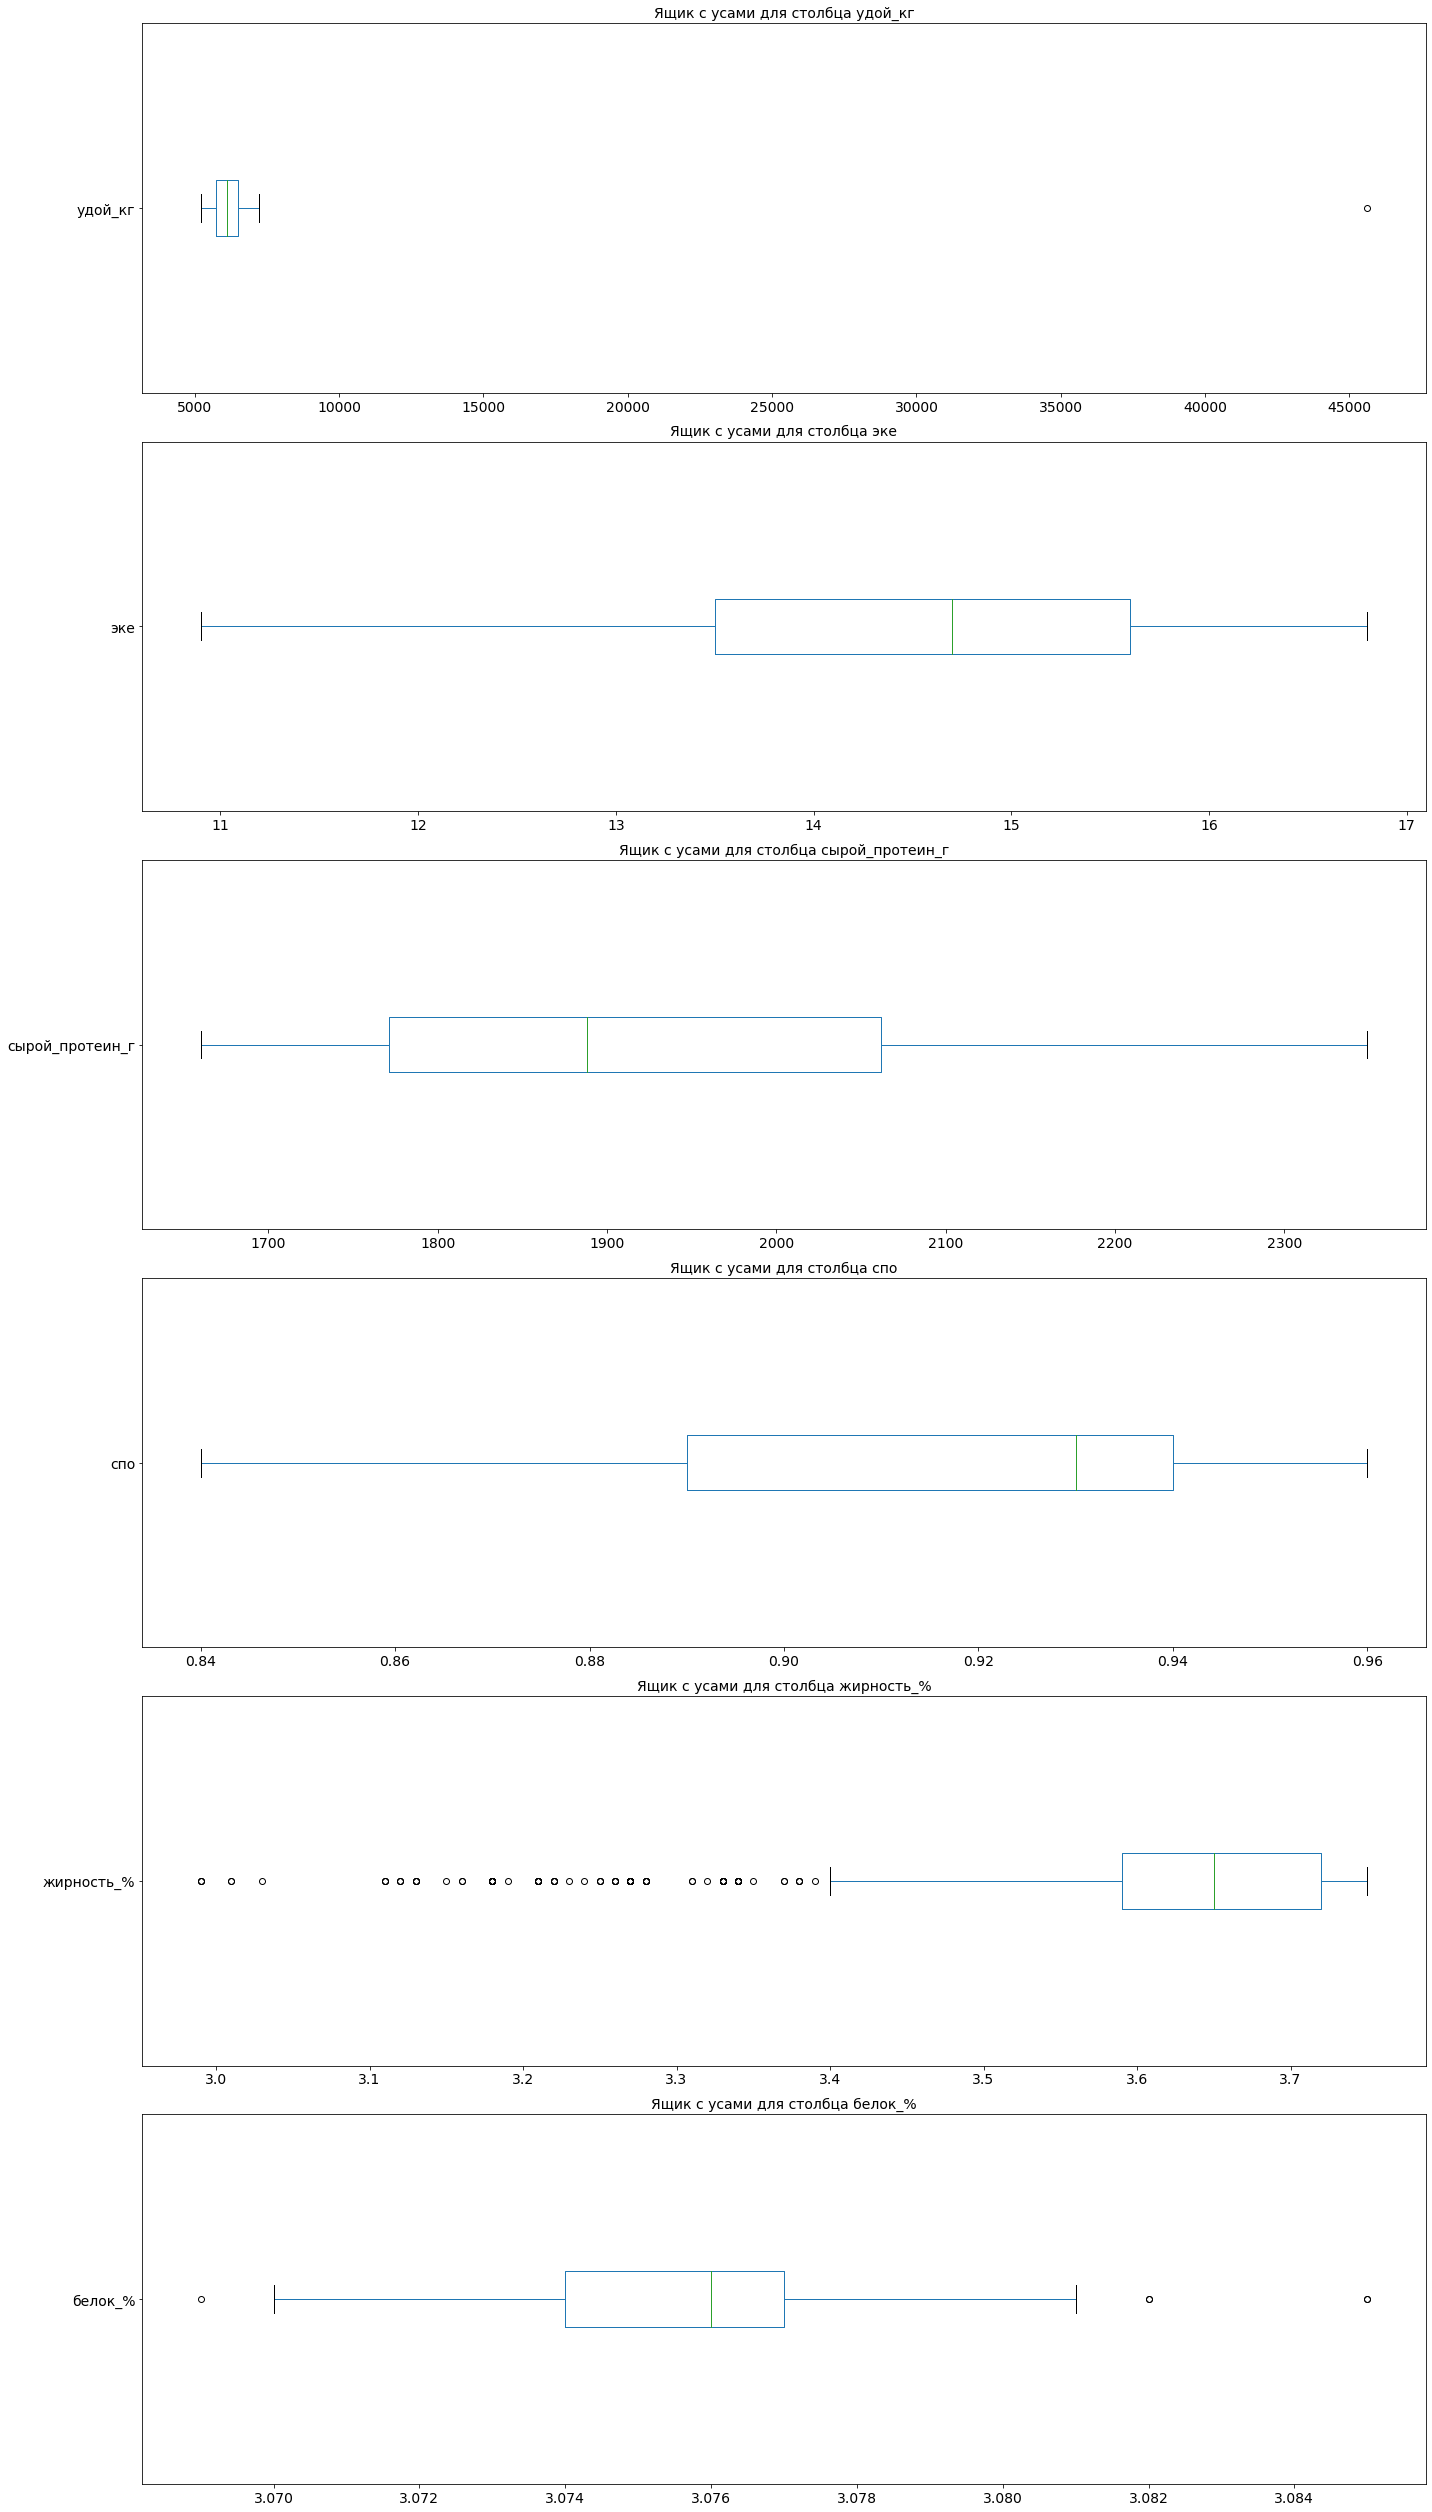

In [28]:
# Создаём переменную в который будет список с количественными значениями ferma_main_df
cols_to_check = ['удой_кг', 'эке', 'сырой_протеин_г', 'спо', 'жирность_%', 'белок_%']

fig, axes = plt.subplots(nrows=len(cols_to_check), figsize=(20, 35))

for i, col in enumerate(cols_to_check):
    ferma_main_df[col].plot(kind='box', vert=False, ax=axes[i], fontsize=14)
    axes[i].set_title(f"Ящик с усами для столбца {col}", fontsize=14)

plt.tight_layout()
plt.show()

In [29]:
max_row = ferma_main_df.loc[ferma_main_df['удой_кг'].idxmax()]
max_row

id                              17
удой_кг                      45616
эке                           11.5
сырой_протеин_г               1675
спо                           0.93
порода              Вис Бик Айдиал
тип_пастбища             Холмистое
порода_папы_быка            Айдиал
жирность_%                    3.22
белок_%                      3.076
вкус_молока                 Вкусно
возраст                Более_2_лет
Name: 16, dtype: object

In [30]:
ferma_dad_df = ferma_dad_df.drop(ferma_dad_df[ferma_dad_df['id'] == 17].index)
ferma_dad_df.head(17)

,id,имя_папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин
5,6,Барин
6,7,Соловчик
7,8,Геркулес
8,9,Буйный
9,10,Барин


In [31]:
# Вычисляем интерквартильный размах
Q1 = ferma_main_df['удой_кг'].quantile(0.25)
Q3 = ferma_main_df['удой_кг'].quantile(0.75)
IQR = Q3 - Q1

# Определяем границы для удаления выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Фильтруем данные, оставляя только значения внутри границ
ferma_main_df = ferma_main_df[(ferma_main_df['удой_кг'] >= lower_bound) & (ferma_main_df['удой_кг'] <= upper_bound)]

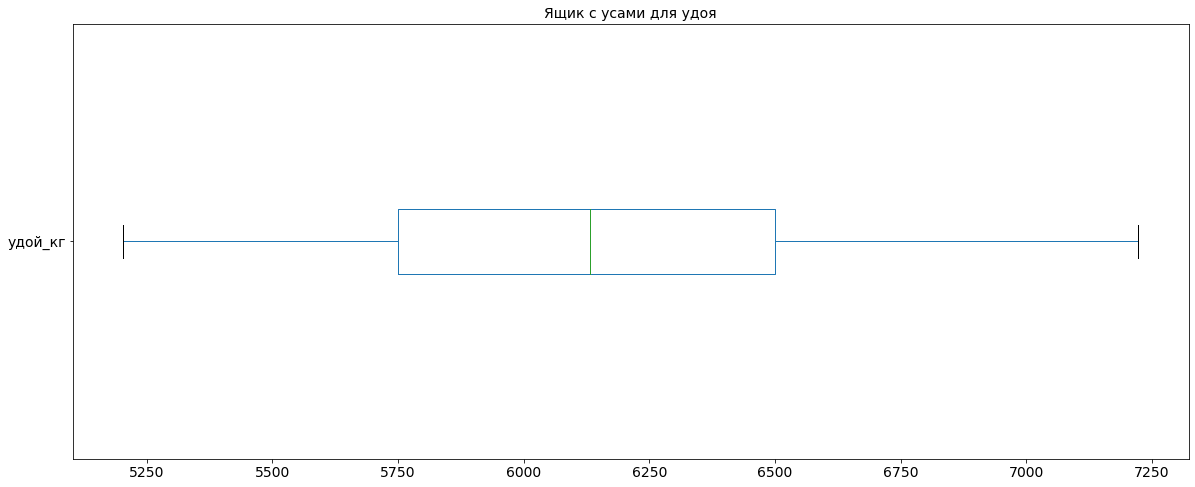

In [32]:
# Создаем ящик с усами для столбца "удой_кг"
plt.figure(figsize=(20, 8))
ferma_main_df['удой_кг'].plot(kind='box', vert=False, fontsize=14)
plt.title("Ящик с усами для удоя", fontsize=14)
plt.show()

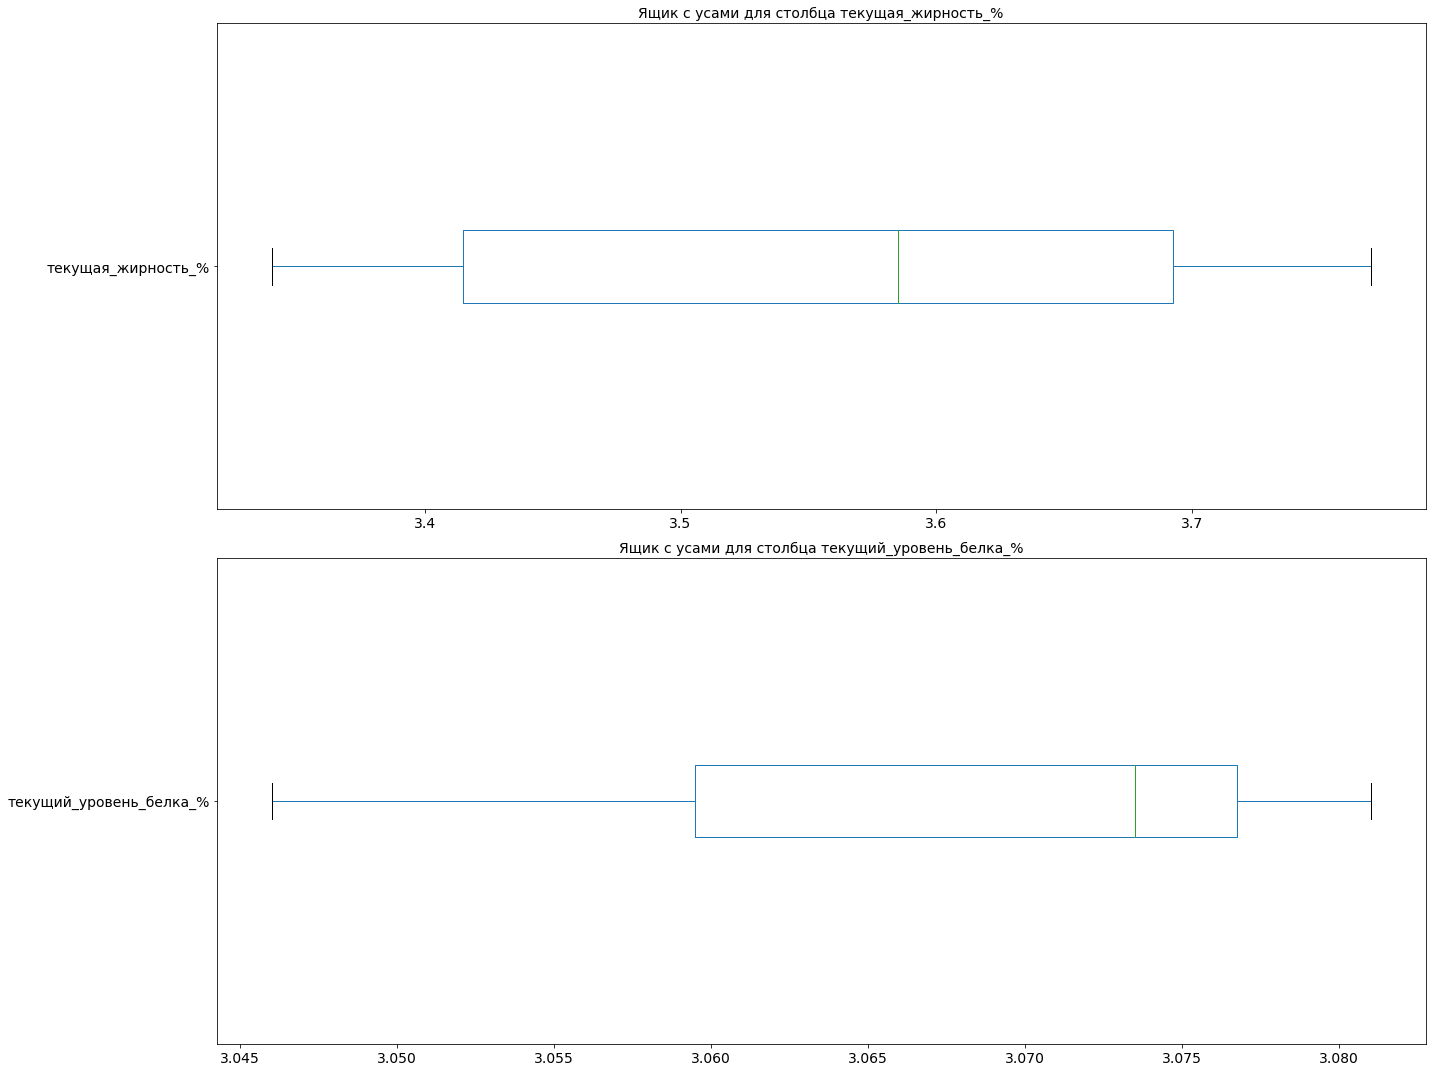

In [33]:
# Создаём переменную в который будет список с количественными значениями cow_buy_df
cols_to_check = ['текущая_жирность_%', 'текущий_уровень_белка_%']

fig, axes = plt.subplots(nrows=len(cols_to_check), figsize=(20, 15))

for i, col in enumerate(cols_to_check):
    cow_buy_df[col].plot(kind='box', vert=False, ax=axes[i], fontsize=14)
    axes[i].set_title(f"Ящик с усами для столбца {col}", fontsize=14)

plt.tight_layout()
plt.show()

#### 2.6 Проверка общей информации после выполненных действий

In [34]:
ferma_main_df.head()

,id,удой_кг,эке,сырой_протеин_г,спо,порода,тип_пастбища,порода_папы_быка,жирность_%,белок_%,вкус_молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,Вкусно,Более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,Вкусно,Менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,Не вкусно,Более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,Не вкусно,Более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,Вкусно,Менее_2_лет


In [35]:
ferma_main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 628
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                628 non-null    int64  
 1   удой_кг           628 non-null    int64  
 2   эке               628 non-null    float64
 3   сырой_протеин_г   628 non-null    int64  
 4   спо               628 non-null    float64
 5   порода            628 non-null    object 
 6   тип_пастбища      628 non-null    object 
 7   порода_папы_быка  628 non-null    object 
 8   жирность_%        628 non-null    float64
 9   белок_%           628 non-null    float64
 10  вкус_молока       628 non-null    object 
 11  возраст           628 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 63.8+ KB


In [36]:
ferma_main_df.describe()

,id,удой_кг,эке,сырой_протеин_г,спо,жирность_%,белок_%
count,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000
mean,315.474522,6125.968153,14.548726,1923.759554,0.913089,3.604268,3.075670
std,181.475367,475.857053,1.301777,182.832816,0.032221,0.168093,0.002551
min,1.000000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,158.750000,5749.750000,13.500000,1771.750000,0.890000,3.590000,3.074000
50%,315.500000,6132.500000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,472.250000,6501.000000,15.600000,2062.250000,0.940000,3.720000,3.077000
max,629.000000,7222.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


In [37]:
ferma_main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 628
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                628 non-null    int64  
 1   удой_кг           628 non-null    int64  
 2   эке               628 non-null    float64
 3   сырой_протеин_г   628 non-null    int64  
 4   спо               628 non-null    float64
 5   порода            628 non-null    object 
 6   тип_пастбища      628 non-null    object 
 7   порода_папы_быка  628 non-null    object 
 8   жирность_%        628 non-null    float64
 9   белок_%           628 non-null    float64
 10  вкус_молока       628 non-null    object 
 11  возраст           628 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 63.8+ KB


In [38]:
ferma_dad_df.head()

,id,имя_папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [39]:
ferma_dad_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        628 non-null    int64 
 1   имя_папы  628 non-null    object
dtypes: int64(1), object(1)
memory usage: 14.7+ KB


In [40]:
ferma_dad_df.describe()

,id
count,628.000000
mean,315.474522
std,181.475367
min,1.000000
25%,158.750000
50%,315.500000
75%,472.250000
max,629.000000


In [41]:
cow_buy_df.head()

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность_%,текущий_уровень_белка_%,возраст
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,Более_2_лет
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,Менее_2_лет
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,Более_2_лет
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,Более_2_лет
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,Более_2_лет


In [42]:
cow_buy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 0 to 18
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   порода                   16 non-null     object 
 1   тип_пастбища             16 non-null     object 
 2   порода_папы_быка         16 non-null     object 
 3   имя_папы                 16 non-null     object 
 4   текущая_жирность_%       16 non-null     float64
 5   текущий_уровень_белка_%  16 non-null     float64
 6   возраст                  16 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.0+ KB


In [43]:
cow_buy_df.describe()

,текущая_жирность_%,текущий_уровень_белка_%
count,16.000000,16.000000
mean,3.571875,3.068250
std,0.141620,0.011264
min,3.340000,3.046000
25%,3.415000,3.059500
50%,3.585000,3.073500
75%,3.692500,3.076750
max,3.770000,3.081000


> **Выводы по второму шагу:**
>
> Во втором шаге были проделаны следующие действия: 
>  - переименование столбцов;
>  - изменение типов данных;
>  - поиск и удаление явных и неявных дубликатов;
>  - привидение всех значений к одному регистру;
>  - поиск аномальных значений;
>  - проверка проделанных действий.
>
> **После проведённых действий можно сделать следующие выводы:**
> 1. столбцы были написаны не по стандартам python. Столбцы были приведены к одному регистру и написаны по стандартам snake_case;
> 2. изменение типов данных:
>  - **ferma_main_df**: ["эке", "спо", "жирность_%", "белок_%"] из типа object в float, предварительно изменив разделитель "," на ".";
>  - **cow_buy_df**: ["текущая_жирность_%", "текущий_уровень_белка_%"] из типа object в float, предварительно изменив разделитель "," на ".".
> 3. в датафреймах **ferma_main_df** и **cow_buy_df** были явные дубликаты, которые были удалены, также в этих датафреймах были неявные дубликаты которые были устранены;
> 4. значения были привидены к одному регистру;
> 5. в процессе поиска аномальных значений выяснилось, что в столбце "удой_кг" датафрейма **ferma_main_df** были аномалия, который были удалены. В остальных стобцах с количественными значениями тоже были аномалии, но умеренные, в столбцах ["жирность_%", "белок_%"]. В датафрейме **cow_buy_df** нет аномалий;
> 6. после устранения аномалии в **ferma_main_df** была удалена строка из **ferma_dad_df** по id;
> 7. после проверки всех проделанных действий данные готовы к исследоветельскому анализу и дальнейших действий.

## 3. Исследовательский анализ данных

#### 3.1 Создание функций для построения графиков

In [44]:
# Функция для категориальных данных
def plot_categorical_countplot(data, column, title, xlabel, ylabel, order=None, edgecolor='black'):
    plt.figure(figsize=(12, 6))
    sns.countplot(data=data, x=column, order=order, edgecolor=edgecolor)
    plt.title(title)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.grid(True)
    plt.show()

# Функция для количественных данных
def plot_numerical_distribution(data, column, title, xlabel, ylabel, bins=30, kde=True, color='red', edgecolor='black'):
    plt.figure(figsize=(12, 6))
    sns.histplot(data=data, x=column, bins=bins, kde=kde, color=color, edgecolor=edgecolor)
    plt.title(title)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.grid(True)
    plt.show()

#### 3.1.1 Проведение статистического анализа и построение графиков для всех признаков **ferma_main_df**

##### 3.1.1.1 Характеристики коровы

In [45]:
# Выберем только нужные признаки
selected_columns = ['порода', 'порода_папы_быка', 'возраст']
subset_df = ferma_main_df[selected_columns]

# Выведем описательные статистики
summary_stats = subset_df.describe(include='all')
print(summary_stats)

                порода порода_папы_быка      возраст
count              628              628          628
unique               2                2            2
top     Вис Бик Айдиал           Айдиал  Более_2_лет
freq               372              317          518


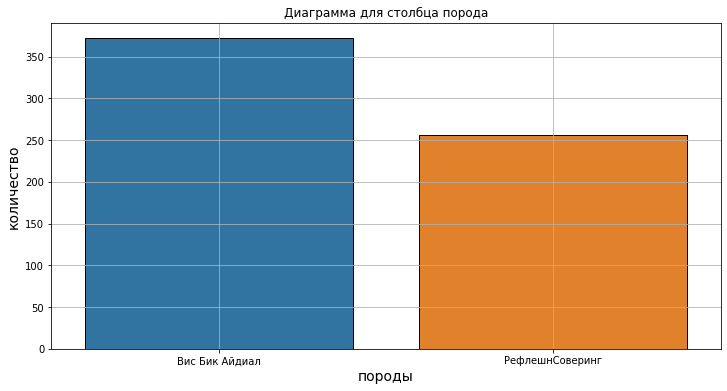

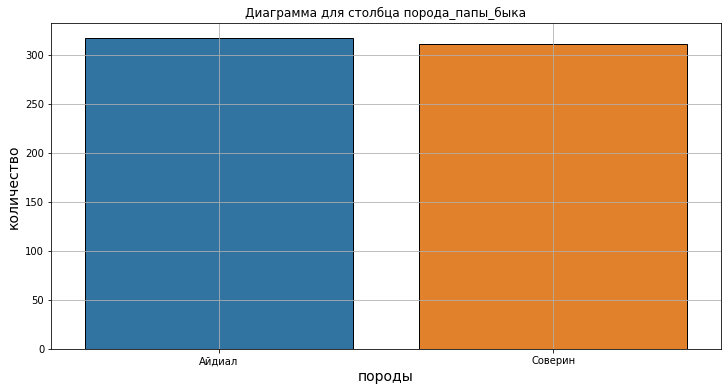

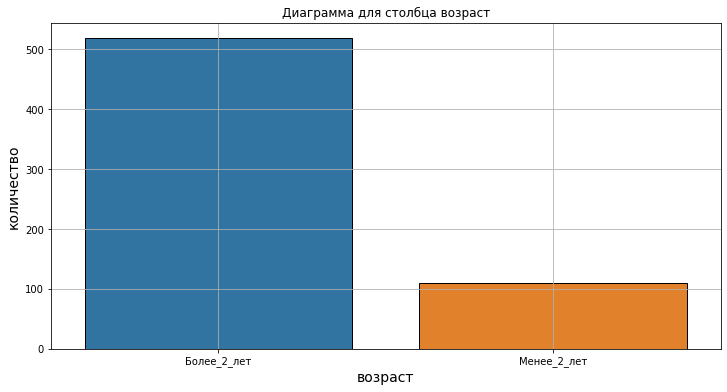

In [46]:
# Построим столбцатые диаграммы по характеристике коров, ferma_main_df
plot_categorical_countplot(ferma_main_df, 'порода', 
                           'Диаграмма для столбца порода', 'породы', 'количество')
plot_categorical_countplot(ferma_main_df, 'порода_папы_быка', 
                           'Диаграмма для столбца порода_папы_быка', 'породы', 'количество')
plot_categorical_countplot(ferma_main_df, 'возраст', 
                           'Диаграмма для столбца возраст', 'возраст', 'количество')

##### 3.1.1.2 Характеристики корма

In [47]:
# Выберем только нужные признаки
selected_columns = ['эке', 'сырой_протеин_г', 'спо']
subset_df = ferma_main_df[selected_columns]

# Выведем описательные статистики
summary_stats = subset_df.describe(include='all')
print(summary_stats)

              эке  сырой_протеин_г         спо
count  628.000000       628.000000  628.000000
mean    14.548726      1923.759554    0.913089
std      1.301777       182.832816    0.032221
min     10.900000      1660.000000    0.840000
25%     13.500000      1771.750000    0.890000
50%     14.700000      1888.000000    0.930000
75%     15.600000      2062.250000    0.940000
max     16.800000      2349.000000    0.960000


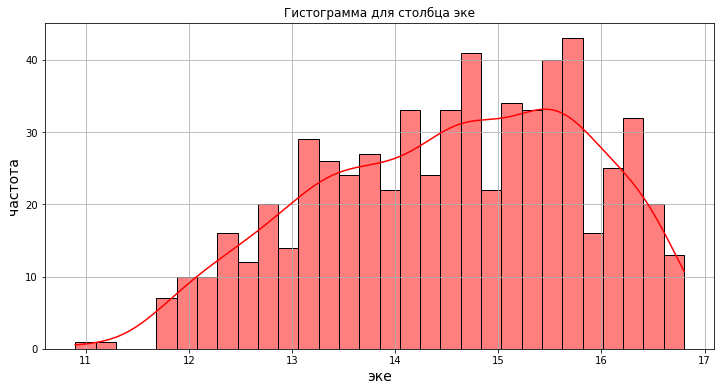

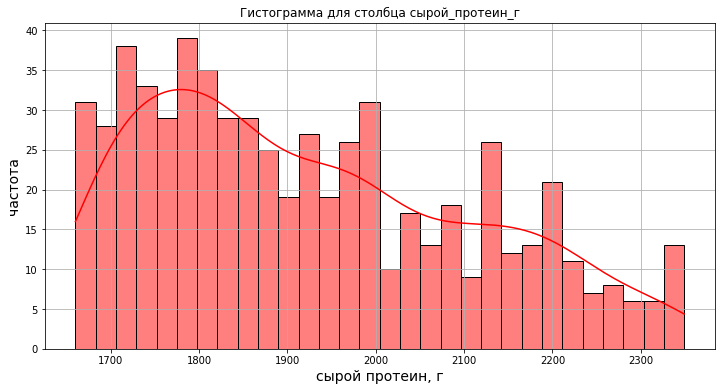

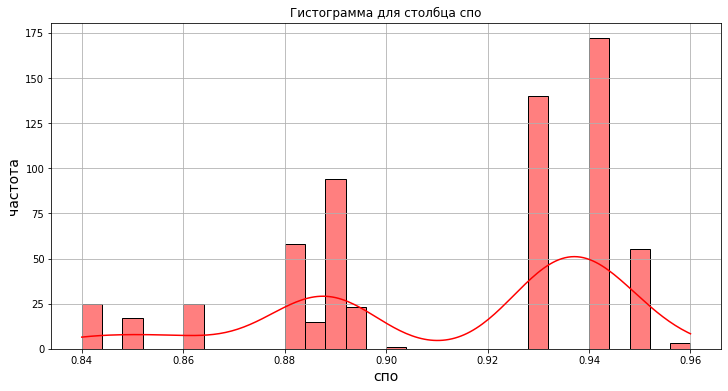

In [48]:
# Потсроим гистограммы по характеристикам корма, ferma_main_df
plot_numerical_distribution(ferma_main_df, 'эке', 
                            'Гистограмма для столбца эке', 'эке', 'частота')
plot_numerical_distribution(ferma_main_df, 'сырой_протеин_г', 
                            'Гистограмма для столбца сырой_протеин_г', 'сырой протеин, г', 'частота')
plot_numerical_distribution(ferma_main_df, 'спо', 
                            'Гистограмма для столбца спо', 'спо', 'частота')

##### 3.1.1.3 Характеристика пастбища

In [49]:
# Выберем только нужные признаки
selected_columns = ["тип_пастбища"]
subset_df = ferma_main_df[selected_columns]

# Выведем описательные статистики
summary_stats = subset_df.describe(include='all')
print(summary_stats)

       тип_пастбища
count           628
unique            2
top       Холмистое
freq            350


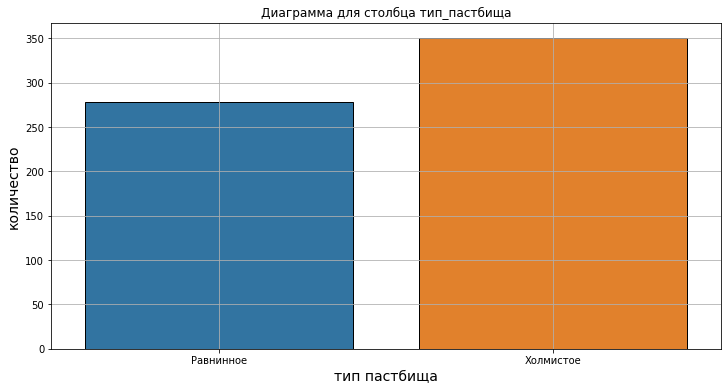

In [50]:
# Построим столбчатую диаграмму по характеристике пастбища, ferma_main_df
plot_categorical_countplot(ferma_main_df, 'тип_пастбища', 
                           'Диаграмма для столбца тип_пастбища', 'тип пастбища', 'количество')

##### 3.1.1.4 Характеристики молока

In [51]:
# Выберем только нужные признаки
selected_columns = ['удой_кг', 'жирность_%', 'белок_%', 'вкус_молока']
subset_df = ferma_main_df[selected_columns]

# Выведем описательные статистики
summary_stats = subset_df.describe(include='all')
print(summary_stats)

            удой_кг  жирность_%     белок_% вкус_молока
count    628.000000  628.000000  628.000000         628
unique          NaN         NaN         NaN           2
top             NaN         NaN         NaN      Вкусно
freq            NaN         NaN         NaN         370
mean    6125.968153    3.604268    3.075670         NaN
std      475.857053    0.168093    0.002551         NaN
min     5204.000000    2.990000    3.069000         NaN
25%     5749.750000    3.590000    3.074000         NaN
50%     6132.500000    3.650000    3.076000         NaN
75%     6501.000000    3.720000    3.077000         NaN
max     7222.000000    3.750000    3.085000         NaN


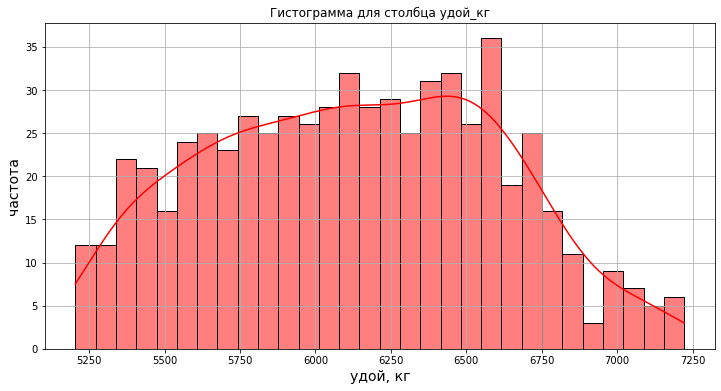

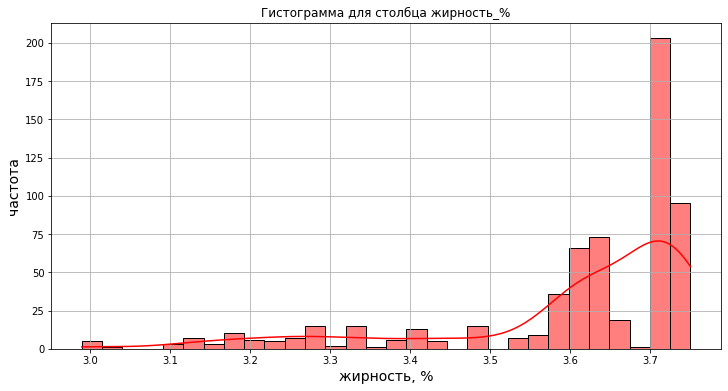

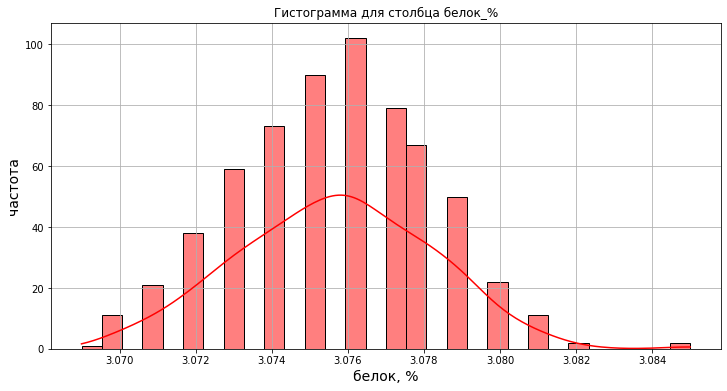

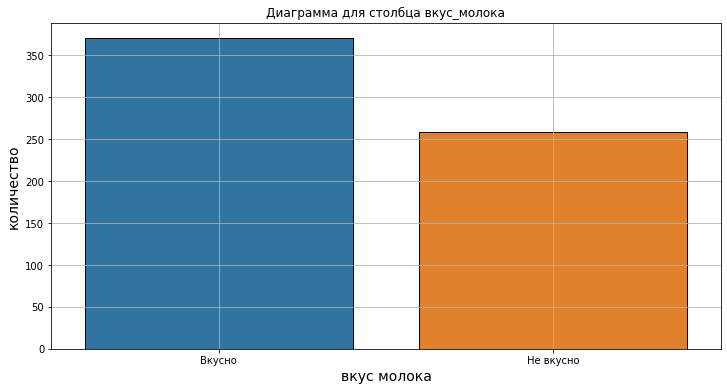

In [52]:
# Построим гистограммы и диаграмму по характеристике молока, ferma_main_df
plot_numerical_distribution(ferma_main_df, 'удой_кг', 
                            'Гистограмма для столбца удой_кг', 'удой, кг', 'частота')
plot_numerical_distribution(ferma_main_df, 'жирность_%', 
                            'Гистограмма для столбца жирность_%', 'жирность, %', 'частота')
plot_numerical_distribution(ferma_main_df, 'белок_%', 
                            'Гистограмма для столбца белок_%', 'белок, %', 'частота')
plot_categorical_countplot(ferma_main_df, 'вкус_молока', 
                           'Диаграмма для столбца вкус_молока', 'вкус молока', 'количество')

#### 3.1.2 Проведение статистического анализа и построение графиков для всех всех признаков **cow_buy_df**

##### 3.1.2.1 Характеристики молока

In [53]:
# Выберем только нужные признаки
selected_columns = ['порода', 'порода_папы_быка', 'имя_папы', 'возраст']
subset_df = cow_buy_df[selected_columns]

# Выведем описательные статистики
summary_stats = subset_df.describe(include='all')
print(summary_stats)

                 порода порода_папы_быка имя_папы      возраст
count                16               16       16           16
unique                2                2        4            2
top     РефлешнСоверинг          Соверин   Буйный  Более_2_лет
freq                  8               10        7           11


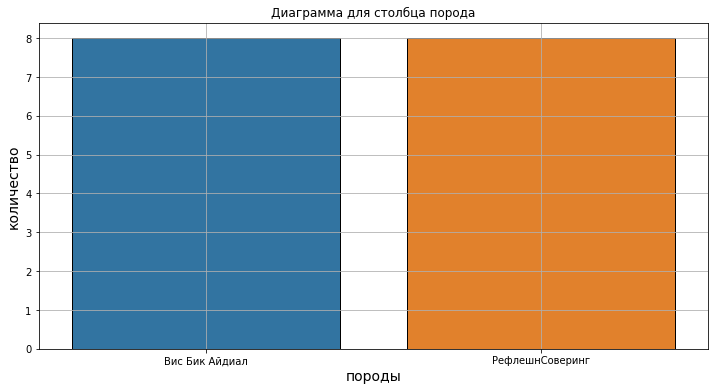

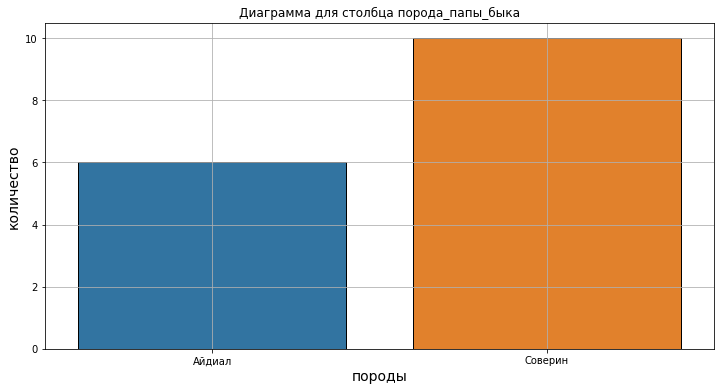

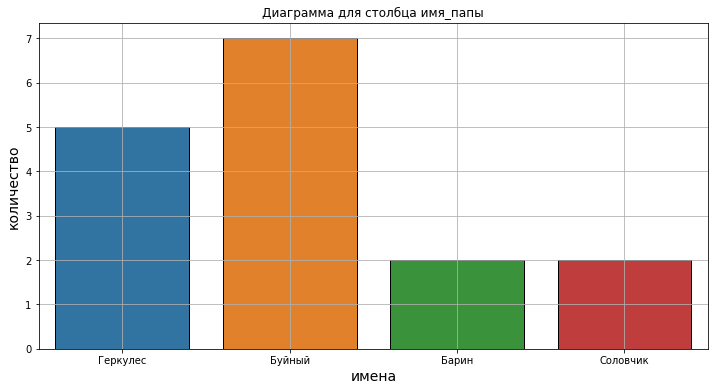

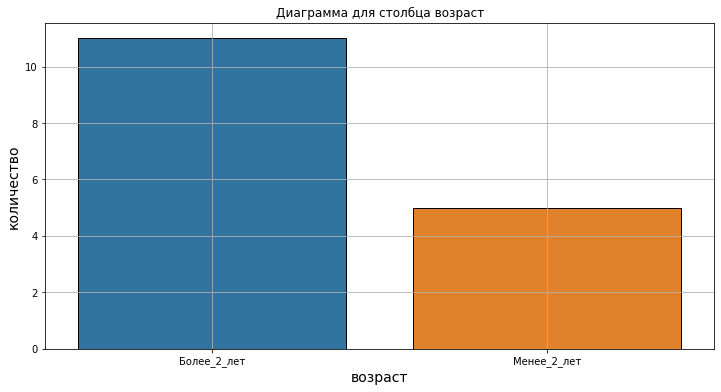

In [54]:
# Построим столбцатые диаграммы по характеристике коров, cow_buy_df
plot_categorical_countplot(cow_buy_df, 'порода', 
                           'Диаграмма для столбца порода', 'породы', 'количество')
plot_categorical_countplot(cow_buy_df, 'порода_папы_быка', 
                           'Диаграмма для столбца порода_папы_быка', 'породы', 'количество')
plot_categorical_countplot(cow_buy_df, 'имя_папы', 
                           'Диаграмма для столбца имя_папы', 'имена', 'количество')
plot_categorical_countplot(cow_buy_df, 'возраст', 
                           'Диаграмма для столбца возраст', 'возраст', 'количество')

##### 3.1.2.2 Характеристика пастбища

In [55]:
# Выберем только нужные признаки
selected_columns = ["тип_пастбища"]
subset_df = cow_buy_df[selected_columns]

# Выведем описательные статистики
summary_stats = subset_df.describe(include='all')
print(summary_stats)

       тип_пастбища
count            16
unique            2
top       Равнинное
freq              8


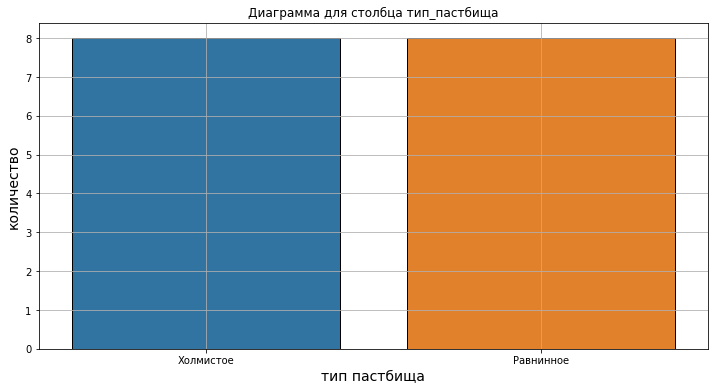

In [56]:
# Построим столбчатую диаграмму по характеристике пастбища, cow_buy_df
plot_categorical_countplot(cow_buy_df, 'тип_пастбища', 'Диаграмма для столбца тип_пастбища', 'тип пастбища', 'количество')

##### 3.1.2.3 Характеристики молока

In [57]:
# Выберем только нужные признаки
selected_columns = ['текущая_жирность_%', 'текущий_уровень_белка_%']
subset_df = cow_buy_df[selected_columns]

# Выведем описательные статистики
summary_stats = subset_df.describe(include='all')
print(summary_stats)

       текущая_жирность_%  текущий_уровень_белка_%
count           16.000000                16.000000
mean             3.571875                 3.068250
std              0.141620                 0.011264
min              3.340000                 3.046000
25%              3.415000                 3.059500
50%              3.585000                 3.073500
75%              3.692500                 3.076750
max              3.770000                 3.081000


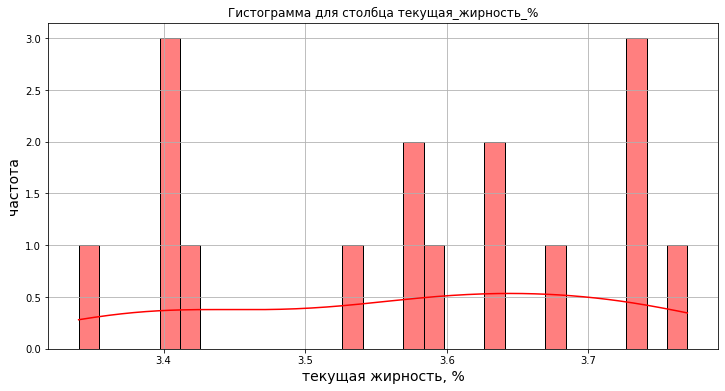

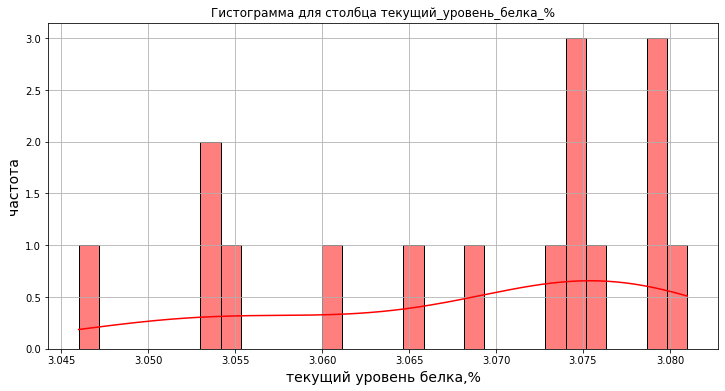

In [58]:
# Построим гистограммы и диаграмму по характеристике молока, cow_buy_df
plot_numerical_distribution(cow_buy_df, 'текущая_жирность_%', 
                            'Гистограмма для столбца текущая_жирность_%', 'текущая жирность, %', 'частота')
plot_numerical_distribution(cow_buy_df, 'текущий_уровень_белка_%', 
                            'Гистограмма для столбца текущий_уровень_белка_%', 'текущий уровень белка,%', 'частота')

> **Выводы по третьему шагу:**
>
> В третьем шаге были проделаны следующие действия: 
>  - созданы функции для построения графиков;
>  - проведён стат. анализ по всем признакам;
>  - построены графики по всем признакам;
>
> **После проведённых действий можно сделать следующие выводы:**
> 1. в датафрейме **ferma_main_df** 4 группы призанаков: характеристика коровы, корма, пастбища и молока;
>  - **характеристика коровы:** две породы коров - Вис Бик Айдиал(372) и РевлешнСоверинг(256), две породы папы быка - Айдиал(317) и Соверин(311), две подгруппы возраста коров более двух лет(518) и менее двух лет(110);
>  - **характеристика корма:**
>     - эке: Среднее значение около 14.55, стандартное отклонение 1.30. Вероятно, нормальное распределение без выбросов.;
>     - сырой_протеин_г: Среднее значение около 1923.76, стандартное отклонение 182.83. Нет явных выбросов;
>     - спо: Среднее значение около 0.91, стандартное отклонение 0.03. Нет явных выбросов.
>  - **характеристика пастбища:** два типа пастбища - холмистое(350) и равнинное(278);
>  - **характеристика молока:**
      - удой_кг: Средний удой молока около 6126 кг, с минимальным значением в 5204 кг и максимальным в 7222 кг. На первый взгляд, выбросов нет;
      - жирность_%: Средняя жирность молока составляет примерно 3.60%, со стандартным отклонением 0.17%. Нет явных выбросов, распределение может считаться нормальным;
      - белок_%: Средний процент белка около 3.08%, со стандартным отклонением 0.00%. Нет явных выбросов, распределение может считаться нормальным;
      - вкус_молока: Два уникальных значения: "Вкусно" и, вероятно, другой вариант. "Вкусно" встречается чаще всего. оценка вкуса молока - вкусно(370) и не вкусно(258).
> 2. в датафрейме **cow_buy_df** 3 группы призанаков: характеристика коровы, пастбища и молока;
>  - **характеристика коровы:** две породы коров - Вис Бик Айдиал(8) и РевлешнСоверинг(8), две породы папы быка - Соверин(10) и Айдиал(6), 4 подгруппы имен коров -  Геркулес(5), Буйный(7), Барин(2) и Соловчик(2);
>  - **характеристика пастбища:** два типа пастбища - холмистое(8) и равнинное(8);
>  - **характеристика молока:**
>     - текущая_жирность_%: Среднее значение около 3.57%, стандартное отклонение 0.14%. Нет явных выбросов;
>     - текущий_уровень_белка_%: Среднее значение около 3.07%, стандартное отклонение 0.01%. Нет явных выбросов.
>
> В данных не замечены выбросы, распределения количественных признаков выглядят нормальными.

## 4. Корреляционный анализ

#### 4.1 Рассчёт коэффициентов корреляции между всеми признаками, **ferma_main_df**

In [59]:
# Группа 1: Характеристики корма
feed_characteristics = ferma_main_df[['эке', 'сырой_протеин_г', 'спо']]

# Группа 2: Характеристики молока
milk_characteristics = ferma_main_df[['удой_кг', 'жирность_%', 'белок_%', 'вкус_молока']]

# Расчет коэффициентов корреляции
correlation_feed = feed_characteristics.corr(method="spearman")
correlation_milk = milk_characteristics.corr(method="spearman")

# Вывод результатов
print("\nКорреляция характеристик корма:")
print(correlation_feed)

print("\nКорреляция характеристик молока:")
print(correlation_milk)


Корреляция характеристик корма:
                      эке  сырой_протеин_г       спо
эке              1.000000         0.384747  0.741962
сырой_протеин_г  0.384747         1.000000  0.485890
спо              0.741962         0.485890  1.000000

Корреляция характеристик молока:
             удой_кг  жирность_%   белок_%
удой_кг     1.000000    0.688506 -0.005701
жирность_%  0.688506    1.000000  0.043125
белок_%    -0.005701    0.043125  1.000000


##### 4.1.1 Рассчёт коэффициентов корреляции между всеми признаками, **cow_buy_df**

In [60]:
# Группа 1: Характеристики молока
milk_characteristics = cow_buy_df[['текущая_жирность_%', 'текущий_уровень_белка_%']]

# Расчет коэффициентов корреляции
correlation_milk = milk_characteristics.corr(method="spearman")

# Вывод результатов
print("\nКорреляция характеристик молока:")
print(correlation_milk)


Корреляция характеристик молока:
                         текущая_жирность_%  текущий_уровень_белка_%
текущая_жирность_%                 1.000000                -0.291234
текущий_уровень_белка_%           -0.291234                 1.000000


#### 4.2 Построние диаграммы рассеяния

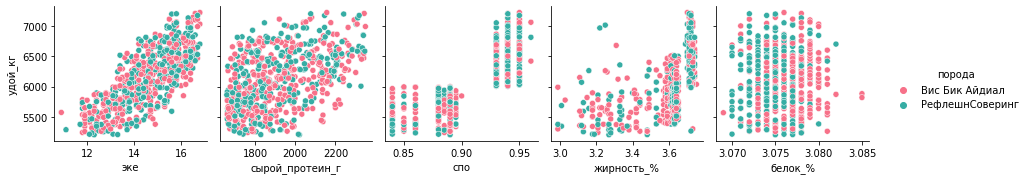

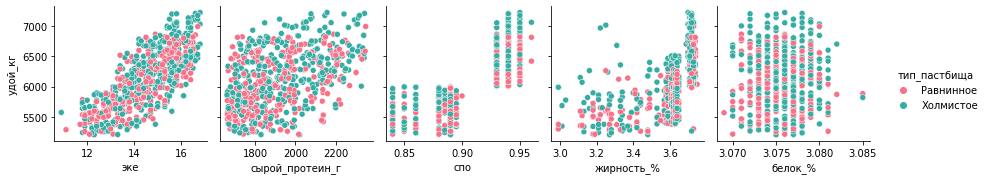

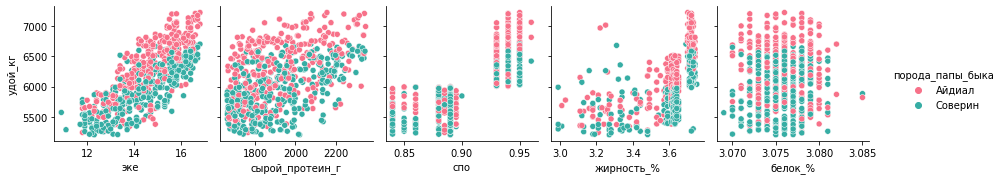

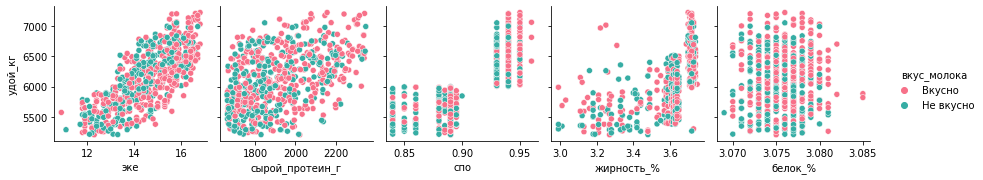

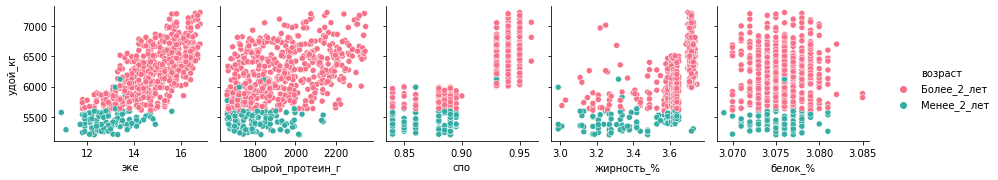

In [61]:
# Разделение на количественные и категориальные значения
quantitative_signs = ["эке", "сырой_протеин_г", "спо", "жирность_%", "белок_%"]
categorical_signs = ["порода", "тип_пастбища", "порода_папы_быка", "вкус_молока", "возраст"]

# Создадим парные диаграммы рассеяния для каждого категориального признака
for category in categorical_signs:
    sns.pairplot(ferma_main_df, x_vars=quantitative_signs, y_vars="удой_кг", hue=category, palette="husl")
    plt.show()

#### 4.3 Матрица корреляции

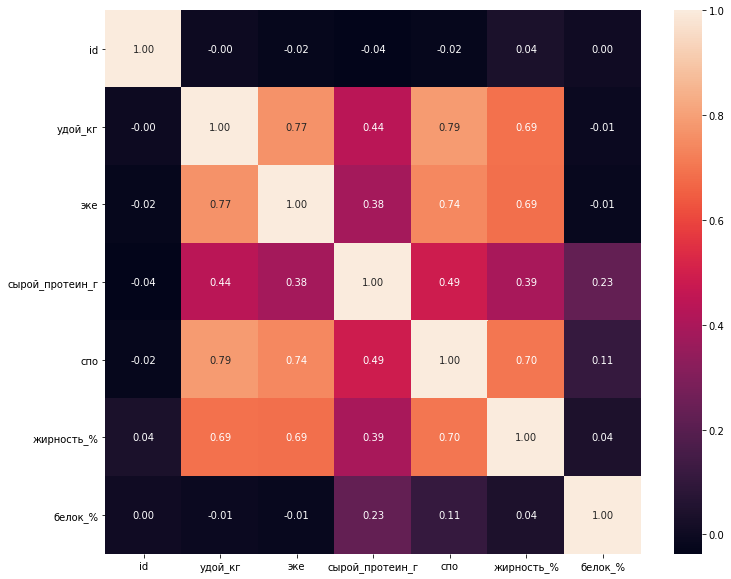

In [62]:
plt.figure(figsize=(12, 10))
sns.heatmap(ferma_main_df.corr(method="spearman"), annot=True, fmt='.2f');

> **Выводы по четвёртому шагу:**
>
> В четвёртом шаге были проделаны следующие действия: 
>  - расчитаны коэффициенты корреляции для всех количественных признаков;
>  - построены диаграммы рассеяния для признака "удой_кг";
>  - построены матрица корреляций.
>
> **После проведённых действий можно сделать следующие выводы:**
> 1. Корреляция характеристик корма:
>   - ЭКЕ и Сырой протеин: Корреляция 0.39 говорит о слабой положительной линейной связи. Это может означать, что уровень энергии в корме (ЭКЕ) увеличивается с увеличением содержания сырого протеина. ЭКЕ и СПО: Корреляция 0.75 указывает на сильную положительную линейную связь между энергетической кормовой единицей (ЭКЕ) и сахаро-протеиновым соотношением (СПО). Это может означать, что при увеличении энергии в корме растет и сахаро-протеиновое соотношение.
> 2. Корреляция характеристик молока:
>   - Удой и Жирность: Корреляция 0.60 указывает на среднюю положительную линейную связь. Это может означать, что уровень удоя увеличивается с увеличением жирности молока.
>   - Удой и Белок: Корреляция 0.00 означает отсутствие линейной связи между удоем и содержанием белка в молоке.
> 3. Корреляция характеристик текущего молока:
>   - Текущая жирность и Текущий уровень белка: Корреляция -0.30 говорит о слабой отрицательной линейной связи. Это может означать, что уровень текущей жирности уменьшается с увеличением текущего уровня белка.
>
> Для характеристик корма, есть как слабые, так и сильные линейные связи между признаками.
В характеристиках молока, удой коррелирует с жирностью, но не коррелирует с белком.
Для текущих характеристик молока, текущая жирность и текущий уровень белка слабо коррелируют между собой.
>
> Тип взаимосвязи:
> для коррелирующих признаков (например, ЭКЕ и СПО), можно предположить линейную зависимость, но это не означает ее причинно-следственность.
>
> Нелинейные связи:
> корреляции линейные, и не дают информации о нелинейных связях. 
>
> Мультиколлинеарность:
> для характеристик корма, корреляция между ЭКЕ и СПО может подразумевать наличие мультиколлинеарности. При построении модели это может потребовать внимания и, возможно, исключения одного из признаков.

## 5. Обучение модели линейной регрессии

#### 5.1 Первая модель

R2 Linear Regression (Model 1) = 0.7844078173416966
MAE Linear Regression (Model 1) = 164.2419446347493
RMSE Linear Regression (Model 1) = 209.49227911706086
MSE Linear Regression (Model 1) = 43887.015009660536


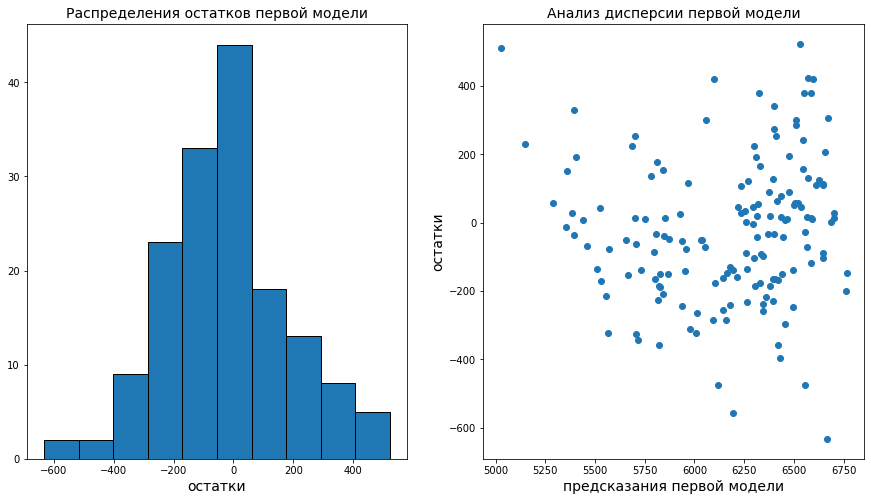

In [63]:
# Создаём константу RANDOM_STATE
RANDOM_STATE = 42

# Создаем DataFrame с данными
df_model1 = ferma_main_df

# Отделяем целевую переменную от признаков
X_model1 = df_model1.drop(["удой_кг", "жирность_%", "белок_%", "вкус_молока"], axis=1)
y_model1 = df_model1["удой_кг"]

# Разделение на тренировочный и тестовый наборы
X_train_model1, X_test_model1, y_train_model1, y_test_model1 = train_test_split(X_model1, y_model1, random_state=RANDOM_STATE)

# Определение категориальных и числовых признаков
cat_col_names_model1 = ["порода", "тип_пастбища", "порода_папы_быка", "возраст"]
num_col_names_model1 = ["эке", "сырой_протеин_г", "спо"]

# Преобразование числовых признаков
scaler = StandardScaler()
X_train_scaled_model1 = scaler.fit_transform(X_train_model1[num_col_names_model1])
X_test_scaled_model1 = scaler.transform(X_test_model1[num_col_names_model1])

# Преобразование категориальных признаков с помощью one-hot encoding
encoder_model1 = OneHotEncoder(drop='first', sparse_output=False)
X_train_ohe_model1 = encoder_model1.fit_transform(X_train_model1[cat_col_names_model1])
X_test_ohe_model1 = encoder_model1.transform(X_test_model1[cat_col_names_model1])

encoder_col_names_model1 = encoder_model1.get_feature_names_out()

# Создание DataFrame из преобразованных массивов
X_train_ohe_model1 = pd.DataFrame(X_train_ohe_model1, columns=encoder_col_names_model1)
X_test_ohe_model1 = pd.DataFrame(X_test_ohe_model1, columns=encoder_col_names_model1)

# Создание DataFrame из преобразованных массивов
X_train_scaled_model1 = pd.DataFrame(X_train_scaled_model1, columns=num_col_names_model1)
X_test_scaled_model1 = pd.DataFrame(X_test_scaled_model1, columns=num_col_names_model1)

# Объединение преобразованных признаков
X_train_model1 = pd.concat([X_train_ohe_model1, X_train_scaled_model1], axis=1)
X_test_model1 = pd.concat([X_test_ohe_model1, X_test_scaled_model1], axis=1)

# Инициализация и обучение модели линейной регрессии
model_lr_model1 = LinearRegression()
model_lr_model1.fit(X_train_model1, y_train_model1)

# Предсказания на тестовом наборе
predictions_model1 = model_lr_model1.predict(X_test_model1)

# Оценка модели
r2_model1 = r2_score(y_test_model1, predictions_model1)  
print("R2 Linear Regression (Model 1) =", r2_model1)
mae_model1 = mean_absolute_error(y_test_model1, predictions_model1)
print("MAE Linear Regression (Model 1) =", mae_model1)
rmse_model1 = mean_squared_error(y_test_model1, predictions_model1, squared=False)
print("RMSE Linear Regression (Model 1) =", rmse_model1)
mse_model1 = mean_squared_error(y_test_model1, predictions_model1)
print("MSE Linear Regression (Model 1) =", mse_model1)

# Анализ остатков
residuals_model1 = y_test_model1 - predictions_model1
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))
axes[0].hist(x=residuals_model1, edgecolor='black')
axes[0].set_title('Распределения остатков первой модели', fontsize=14)
axes[0].set_xlabel('остатки', fontsize=14)

axes[1].scatter(x=predictions_model1, y=residuals_model1)
axes[1].set_xlabel('предсказания первой модели', fontsize=14)
axes[1].set_ylabel('остатки', fontsize=14)
axes[1].set_title('Анализ дисперсии первой модели', fontsize=14)
plt.show()

#### 5.2 Вторая модель

R2 Linear Regression (Model 2) = 0.7076033653018018
MAE Linear Regression (Model 2) = 189.54412835103432
RMSE Linear Regression (Model 2) = 243.97071660903643
MSE Linear Regression (Model 2) = 59521.71056272676


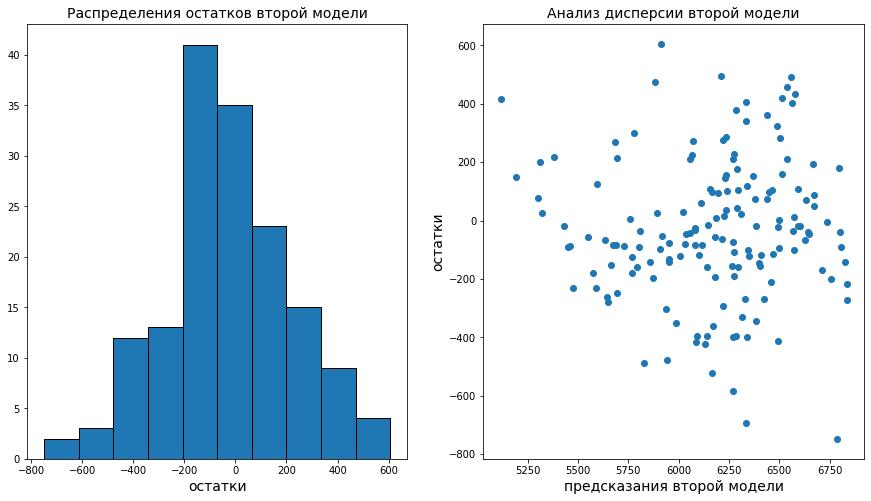

In [65]:
# Создаём константу RANDOM_STATE
RANDOM_STATE = 42

# Создаём DataFrame для второй модели
df_model2 = ferma_main_df.copy()

# Преобразуем СПО в бинарный категориальный признак
spo_threshold = df_model2['спо'] == 0.91
df_model2['spo_binary'] = (df_model2['спо'] > spo_threshold).astype(int)

# Вводим новый признак ЭКЕ^2
df_model2['eke_squared'] = df_model2['эке']**2

# Отделяем целевую переменную от признаков
X_model2 = df_model2.drop(["удой_кг", "спо", "эке", "жирность_%", "белок_%", "вкус_молока"], axis=1)
y_model2 = df_model2["удой_кг"]

# Разделение на тренировочный и тестовый наборы
X_train_model2, X_test_model2, y_train_model2, y_test_model2 = train_test_split(
    X_model2, y_model2, random_state=RANDOM_STATE)

# Определение категориальных и числовых признаков
cat_col_names_model2 = ["порода", "тип_пастбища", "порода_папы_быка", "возраст", "spo_binary"]
num_col_names_model2 = ["сырой_протеин_г", "eke_squared"]

# Разделение на тренировочный и тестовый наборы
X_train_model2, X_test_model2, y_train_model2, y_test_model2 = train_test_split(
    X_model2, y_model2, random_state=RANDOM_STATE)

# Преобразование числовых признаков
scaler_model2 = StandardScaler()
X_train_scaled_model2 = scaler_model2.fit_transform(X_train_model2[num_col_names_model2])
X_test_scaled_model2 = scaler_model2.transform(X_test_model2[num_col_names_model2])

# Преобразование категориальных признаков с помощью one-hot encoding
encoder_model2 = OneHotEncoder(drop='first', sparse_output=False)
X_train_ohe_model2 = encoder_model2.fit_transform(X_train_model2[cat_col_names_model2])
X_test_ohe_model2 = encoder_model2.transform(X_test_model2[cat_col_names_model2])

encoder_col_names_model2 = encoder_model2.get_feature_names_out(cat_col_names_model2)

# Создание DataFrame из преобразованных массивов
X_train_ohe_model2 = pd.DataFrame(X_train_ohe_model2, columns=encoder_col_names_model2)
X_test_ohe_model2 = pd.DataFrame(X_test_ohe_model2, columns=encoder_col_names_model2)

# Создание DataFrame из преобразованных массивов
X_train_scaled_model2 = pd.DataFrame(X_train_scaled_model2, columns=num_col_names_model2)
X_test_scaled_model2 = pd.DataFrame(X_test_scaled_model2, columns=num_col_names_model2)

# Объединение преобразованных признаков
X_train_model2 = pd.concat([X_train_ohe_model2, X_train_scaled_model2], axis=1)
X_test_model2 = pd.concat([X_test_ohe_model2, X_test_scaled_model2], axis=1)

# Инициализация и обучение второй модели линейной регрессии
model_lr2 = LinearRegression()
model_lr2.fit(X_train_model2, y_train_model2)

# Предсказания на тестовом наборе
predictions_model2 = model_lr2.predict(X_test_model2)

# Оценка качества второй модели
r2_model2 = r2_score(y_test_model2, predictions_model2)
print("R2 Linear Regression (Model 2) =", r2_model2)
mae_model2 = mean_absolute_error(y_test_model2, predictions_model2)
print("MAE Linear Regression (Model 2) =", mae_model2)
rmse_model2 = mean_squared_error(y_test_model2, predictions_model2, squared=False)
print("RMSE Linear Regression (Model 2) =", rmse_model2)
mse_model2 = mean_squared_error(y_test_model2, predictions_model2)
print("MSE Linear Regression (Model 2) =", mse_model2)

# Анализ остатков
residuals_model2 = y_test_model2 - predictions_model2
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))
axes[0].hist(x=residuals_model2, edgecolor='black')
axes[0].set_title('Распределения остатков второй модели', fontsize=14)
axes[0].set_xlabel('остатки', fontsize=14)

axes[1].scatter(x=predictions_model2, y=residuals_model2)
axes[1].set_xlabel('предсказания второй модели', fontsize=14)
axes[1].set_ylabel('остатки', fontsize=14)
axes[1].set_title('Анализ дисперсии второй модели', fontsize=14)
plt.show()

#### 5.3 Третья модель

R2 Linear Regression (Model 3) = 0.8247542745210407
MAE Linear Regression (Model 3) = 146.16302445362317
RMSE Linear Regression (Model 3) = 188.87532895055915
MSE Linear Regression (Model 3) = 35673.88988618193


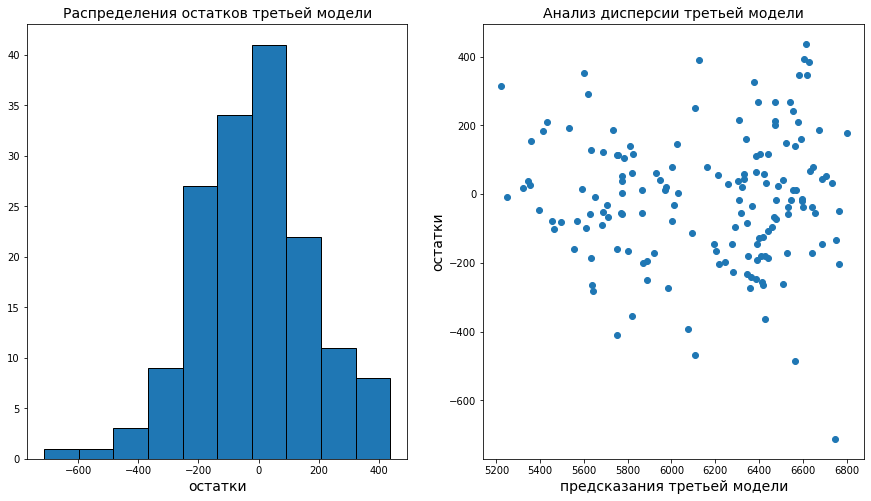

In [66]:
# Создаём константу RANDOM_STATE
RANDOM_STATE = 42

# Создаём DataFrame для модели 3
df_model3 = ferma_main_df.copy()

# Преобразуем СПО в бинарный категориальный признак
spo_threshold = 0.91
df_model3['spo_binary'] = (df_model3['спо'] > spo_threshold).astype(int)

# Вводим новый признак ЭКЕ^2
df_model3['eke_squared'] = df_model3['эке']**2

# Загружаем данные о именах
dad_df = ferma_dad_df.copy()

# Объединим данные о папах с основным DataFrame по столбцу 'id'
merged_df_model3 = pd.merge(df_model3, dad_df[['id', 'имя_папы']], on='id', how='left')

# Отделяем целевую переменную от признаков
X_model3 = merged_df_model3.drop(["удой_кг", "спо", "эке", "жирность_%", "белок_%", "вкус_молока"], axis=1)
y_model3 = merged_df_model3["удой_кг"]

# Разделение на тренировочный и тестовый наборы
X_train_model3, X_test_model3, y_train_model3, y_test_model3 = train_test_split(
    X_model3, y_model3, random_state=RANDOM_STATE)

# Определение категориальных и числовых признаков
cat_col_names_model3 = ["порода", "тип_пастбища", "порода_папы_быка", "возраст", "spo_binary", "имя_папы"]
num_col_names_model3 = ["сырой_протеин_г", "eke_squared"]

# Преобразование числовых признаков
scaler_model3 = StandardScaler()
X_train_scaled_model3 = scaler_model3.fit_transform(X_train_model3[num_col_names_model3])
X_test_scaled_model3 = scaler_model3.transform(X_test_model3[num_col_names_model3])

# Преобразование категориальных признаков с помощью one-hot encoding
encoder_model3 = OneHotEncoder(drop='first', sparse_output=False)
X_train_ohe_model3 = encoder_model3.fit_transform(X_train_model3[cat_col_names_model3])
X_test_ohe_model3 = encoder_model3.transform(X_test_model3[cat_col_names_model3])

encoder_col_names_model3 = encoder_model3.get_feature_names_out(cat_col_names_model3)

# Создание DataFrame из преобразованных массивов
X_train_ohe_model3 = pd.DataFrame(X_train_ohe_model3, columns=encoder_col_names_model3)
X_test_ohe_model3 = pd.DataFrame(X_test_ohe_model3, columns=encoder_col_names_model3)

# Создание DataFrame из преобразованных массивов
X_train_scaled_model3 = pd.DataFrame(X_train_scaled_model3, columns=num_col_names_model3)
X_test_scaled_model3 = pd.DataFrame(X_test_scaled_model3, columns=num_col_names_model3)

# Объединение преобразованных признаков
X_train_model3 = pd.concat([X_train_ohe_model3, X_train_scaled_model3], axis=1)
X_test_model3 = pd.concat([X_test_ohe_model3, X_test_scaled_model3], axis=1)

# Инициализация и обучение третьей модели линейной регрессии
model_lr3 = LinearRegression()
model_lr3.fit(X_train_model3, y_train_model3)

# Предсказания на тестовом наборе
predictions_model3 = model_lr3.predict(X_test_model3)

# Оценка качества третьей модели
r2_model3 = r2_score(y_test_model3, predictions_model3)
print("R2 Linear Regression (Model 3) =", r2_model3)
mae_model3 = mean_absolute_error(y_test_model3, predictions_model3)
print("MAE Linear Regression (Model 3) =", mae_model3)
rmse_model3 = mean_squared_error(y_test_model3, predictions_model3, squared=False)
print("RMSE Linear Regression (Model 3) =", rmse_model3)
mse_model3 = mean_squared_error(y_test_model3, predictions_model3)
print("MSE Linear Regression (Model 3) =", mse_model3)

# Анализ остатков
residuals_model3 = y_test_model3 - predictions_model3
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))
axes[0].hist(x=residuals_model3, edgecolor='black')
axes[0].set_title('Распределения остатков третьей модели', fontsize=14)
axes[0].set_xlabel('остатки', fontsize=14)

axes[1].scatter(x=predictions_model3, y=residuals_model3)
axes[1].set_xlabel('предсказания третьей модели', fontsize=14)
axes[1].set_ylabel('остатки', fontsize=14)
axes[1].set_title('Анализ дисперсии третьей модели', fontsize=14)
plt.show()

In [67]:
# Получаем остатки модели
residuals = y_test_model3 - predictions_model3

# Считаем стандартную ошибку остатков
std_err_residuals = np.std(residuals)

# Рассчитываем 95% доверительный интервал
confidence_interval = st.t.interval(confidence=0.95, df=len(residuals)-1, loc=np.mean(residuals), scale=std_err_residuals)

print("95% Доверительный интервал для остатков:", confidence_interval)

95% Доверительный интервал для остатков: (-387.0742685041385, 356.67122450229516)


#### 5.4 Четвёртая модель

In [68]:
# Создаём константу RANDOM_STATE
RANDOM_STATE = 42

# Создаем DataFrame с данными
cow_df = cow_buy_df.copy()

average_values = ferma_main_df[['эке', 'сырой_протеин_г', 'спо']].mean()
cow_df['эке'] = average_values['эке'] * 1.05
cow_df['сырой_протеин_г'] = average_values['сырой_протеин_г'] * 1.05
cow_df['спо'] = average_values['спо'] * 1.05
cow_df['удой_кг'] = ferma_main_df["удой_кг"]
cow_df['spo_binary'] = (cow_df['спо'] > 0.91).astype(int)
cow_df['eke_squared'] = cow_df['эке']**2

# Отделяем целевую переменную от признаков
X_cow_df = cow_df.drop(["удой_кг", "текущая_жирность_%", "текущий_уровень_белка_%"], axis=1)
y_cow_df = cow_df["удой_кг"]

# Определение категориальных и числовых признаков
cat_col_names_cow_df = ["порода", "тип_пастбища", "порода_папы_быка", "возраст", "spo_binary", "имя_папы"]
num_col_names_cow_df = ["сырой_протеин_г", "eke_squared"]

# Преобразование числовых признаков
X_cow_scaled = scaler_model3.transform(X_cow_df[num_col_names_cow_df])

# Преобразование категориальных признаков с помощью one-hot encoding
X_cow_ohe = encoder_model3.transform(X_cow_df[cat_col_names_cow_df])

# Создаем DataFrame из преобразованных массивов
X_cow_processed = pd.concat([pd.DataFrame(X_cow_ohe, columns=encoder_col_names_model3),
                             pd.DataFrame(X_cow_scaled, columns=num_col_names_model3)], axis=1)

# Получение предсказаний
predictions_cow = model_lr3.predict(X_cow_processed)

# Вывод предсказаний
print("Прогноз удоя коров:")
print(predictions_cow)

Прогноз удоя коров:
[6609.91929681 6378.71102836 6283.99977532 6593.08937654 6542.14606633
 6425.38021759 6571.25973712 6400.54066779 6344.70785976 6617.92892634
 6609.91929681 6127.4747423  6593.08937654 6344.70785976 6425.38021759
 6571.25973712]


> **Выводы по пятому шагу:**
>
> В пятом шаге были проделаны следующие действия: 
> - построены 4 модели простой линейной регрессии для прогноза удоя коров.
>
> **После проведённых действий можно сделать следующие выводы:**
> 
> **Первая модель Linear Regression:**
признаки были выбраны, основываясь на линейных и причинно-следственных связях с удоем коров, разбили данные на тренировочную и тестовую выборки, закодировали категориальные признаки, масштабировали количественные, и обучили модель. R² составил 0.75, остатки распределены равномерно, что подтверждает адекватность модели.
> 
> Остальные оценки качества **первой** модели:
> > MAE (Model 1) = 164.2419446347493\ RMSE (Model 1) = 209.49227911706086\ MSE (Model 1) = 43887.015009660536.
>
> **Вторая модель Linear Regression:**
исключив нелинейность в признаках спо и эке, обучили вторую модель. R² улучшился до 0.81. Диаграммы рассеяния подтвердили, что трансформации признаков помогли улучшить линейную зависимость.
>
> Остальные оценки качества **второй** модели:
> > MAE (Model 2) = 164.2419446347493\ RMSE (Model 2) = 209.49227911706086\ MSE (Model 2) = 43887.015009660536.
>
> **Третья модель Linear Regression:**
добавив признак имя_папы и устранив нелинейность, создали третью модель. R² составил 0.82, подчеркивая, что дополнительные признаки улучшили прогнозную силу модели. Однако, несмотря на успех, дополнительные исследования могут быть полезны для еще более точного предсказания удоя коров.
>
> Остальные оценки качества **третьей** модели:
> > MAE (Model 3) = 146.16302445362317\ RMSE (Model 3) = 188.87532895055915\ MSE (Model 3) = 35673.88988618193
>
> **Четвёртая модель Linear Regression:**
> четвёртая модель была построена на основе лучшей модели(Model 3). С помощью данной модели был спрогнозирован удой коров, которых фермер хочет купить.
>
> Прогноз удоя коров:
[6609.91929681 6378.71102836 6283.99977532 6593.08937654 6542.14606633
 6425.38021759 6571.25973712 6400.54066779 6344.70785976 6617.92892634
 6609.91929681 6127.4747423  6593.08937654 6344.70785976 6425.38021759
 6571.25973712]
>

## 6. Обучение модели логистической регрессии

#### 6.1 Построение модели 

In [69]:
# Создаём константу RANDOM_STATE
RANDOM_STATE = 42

# Создаем DataFrame с данными
df = merged_df_model3.copy()
df["вкус"] = df["вкус_молока"].apply(lambda x: 1 if x == 'Вкусно' else 0)

# Отделяем целевую переменную от признаков
X = df.drop(["вкус_молока"], axis=1)
y = df["вкус"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)

# Определение категориальных и числовых признаков
cat_col_names = ["порода", "тип_пастбища", "порода_папы_быка", "возраст", 'имя_папы', 'spo_binary']
num_col_names = ["эке", "сырой_протеин_г", "спо" , "жирность_%", "белок_%", 'eke_squared']

# Преобразование числовых признаков
scaler_1 = StandardScaler()
X_train_scaled = scaler_1.fit_transform(X_train[num_col_names])
X_test_scaled = scaler_1.transform(X_test[num_col_names])

# Преобразование категориальных признаков с помощью one-hot encoding
encoder_1 = OneHotEncoder(drop='first', sparse_output=False)
X_train_ohe = encoder_1.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder_1.transform(X_test[cat_col_names])

encoder_col_names = encoder_1.get_feature_names_out()

# Создание DataFrame из преобразованных массивов
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

# Создание DataFrame из преобразованных массивов
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

# Объединение преобразованных признаков
X_train_combined = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test_combined = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# Обучение модели логистической регрессии
clf = LogisticRegression()
clf = clf.fit(X_train_combined, y_train)
predictions = clf.predict(X_test_combined)

acc = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions)
precision = precision_score(y_test, predictions)

print('accuracy:', round(acc ,3))
print('recall:', round(recall ,3))
print('precision:', round(precision,3))

accuracy: 0.637
recall: 0.875
precision: 0.626


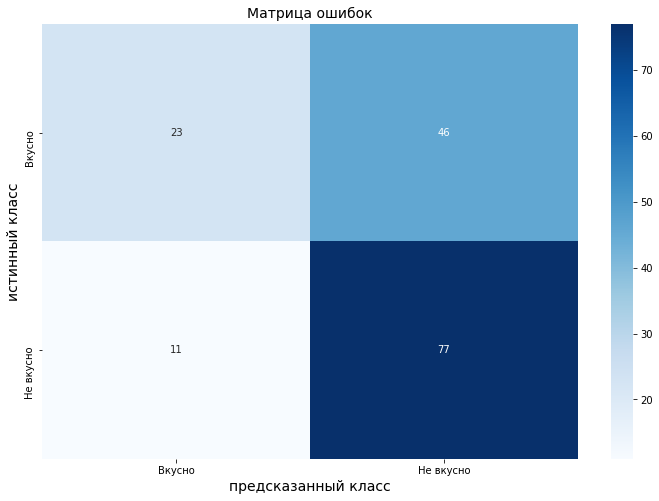

In [70]:
# Построение матрицы ошибок
conf_matrix = confusion_matrix(y_test, predictions)

labels = ['Вкусно', 'Не вкусно']

plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('предсказанный класс', fontsize=14)
plt.ylabel('истинный класс', fontsize=14)
plt.title('Матрица ошибок', fontsize=14)
plt.show()

**Анализ модели логистической регрессии**

**Recall (полнота):**
Эта метрика равна 0.875, что означает, что модель способна правильно выявлять 87.5% всех случаев "Вкусного" молока относительно всех истинно положительных случаев.

**Precision (точность):**
Эта метрика равна 0.626, что означает, что из всех предсказанных моделью "Вкусных" молоко лишь 62.6% действительно являются "Вкусными".
С учетом приоритета заказчика, который важнее считает вкусное молоко, более критичной ошибкой является False Negative (FN), когда модель не улавливает "Вкусное" молоко. Таким образом, фермеру нужна модель с высоким значением pricision.

In [71]:
# Получение вероятностей принадлежности к классам
proba_predictions = clf.predict_proba(X_test_combined)[:, 1]

# Перебор различных порогов и оценка метрик
thresholds = np.arange(0.1, 1.0, 0.05)
best_precision = 0.0
best_threshold = 0.0

for threshold in thresholds:
    updated_predictions = (proba_predictions > threshold).astype(int)
    updated_precision = precision_score(y_test, updated_predictions, zero_division=1)
    updated_recall = recall_score(y_test, updated_predictions)
    
    # Подбор порога, максимизирующего precision
    if updated_precision > best_precision:
        best_precision = updated_precision
        best_threshold = threshold

# Применение лучшего порога
final_predictions = (proba_predictions > best_threshold).astype(int)
final_predictions_labels = np.where(final_predictions == 1, 'Вкусно', 'Не вкусно')

# Вывод метрик с оптимальным порогом
print('Best precision: ', round(best_precision, 3))
print('Corresponding recall: ', round(updated_recall, 3))
print('Best threshold: ', round(best_threshold, 3))

Best precision:  1.0
Corresponding recall:  0.0
Best threshold:  0.8


In [72]:
# Создаём константу RANDOM_STATE
RANDOM_STATE = 42

# Создаем DataFrame с данными
cow_df_2 = cow_buy_df.copy()

average_values = ferma_main_df[['эке', 'сырой_протеин_г', 'спо']].mean()
cow_df_2['эке'] = average_values['эке'] * 1.05
cow_df_2['сырой_протеин_г'] = average_values['сырой_протеин_г'] * 1.05
cow_df_2['спо'] = average_values['спо'] * 1.05
cow_df_2['spo_binary'] = (cow_df_2['спо'] > 0.91).astype(int)
cow_df_2['eke_squared'] = cow_df_2['эке']**2
cow_df_2 = cow_df_2.rename(columns={"текущая_жирность_%": "жирность_%", "текущий_уровень_белка_%": "белок_%"})

X_2 = cow_df_2.copy()

# Определение категориальных и числовых признаков
cat_col_names_cow_2 = ["порода", "тип_пастбища", "порода_папы_быка", "возраст", "имя_папы","spo_binary"]
num_col_names_cow_2 = ["эке", "сырой_протеин_г", "спо", "жирность_%", "белок_%", "eke_squared"]

# Преобразование числовых признаков
X_cow_scaled_2 = scaler_1.transform(X_2[num_col_names_cow_2])

# Преобразование категориальных признаков с использованием того же encoder_1
X_cow_ohe_2 = encoder_1.transform(X_2[cat_col_names_cow_2])

# Объединение преобразованных признаков
X_cow_2 = pd.concat([pd.DataFrame(X_cow_ohe_2, columns=encoder_col_names),
                     pd.DataFrame(X_cow_scaled_2, columns=num_col_names)], axis=1)

# Получение вероятностей принадлежности к классам
proba_predictions_cow_2 = clf.predict_proba(X_cow_2)[:, 1]

# Заданный порог
threshold_cow_2 = 0.8

# Применение порога
final_predictions_cow_2 = (proba_predictions_cow_2 > threshold_cow_2).astype(int)

# Замена 1 на 'Вкусно' и 0 на 'Не вкусно' в столбце 'прогноз_вкуса_молока'
result_cow_df_2 = cow_df_2.copy()
result_cow_df_2['прогноз_вкуса_молока'] = np.where(final_predictions_cow_2 == 1, 'Вкусно', 'Не вкусно')

print(result_cow_df_2[['прогноз_вкуса_молока']])

   прогноз_вкуса_молока
0                Вкусно
1                Вкусно
2             Не вкусно
3             Не вкусно
4             Не вкусно
5             Не вкусно
7                Вкусно
9                Вкусно
10            Не вкусно
11            Не вкусно
12            Не вкусно
13               Вкусно
15            Не вкусно
16               Вкусно
17            Не вкусно
18            Не вкусно


> **Выводы по шестому шагу:**
>
> В шестом шаге были проделаны следующие действия: 
> - построены 2 модели логистической регрессии;
> - построена матрица ошибок;
> - проведён анализ модели логистической регрессии.
>
> **После проведённых действий можно сделать следующие выводы:**
> 
> **Первая модель Logistic Regression:**
Модель логистической регрессии применяется в задачах бинарной классификации, где требуется предсказать принадлежность объекта к одному из двух классов. В данном случае модель была обучена определять, является ли молоко вкусным ("Вкусно") или нет.
> 
> Оценки качества **первой** модели:
> > accuracy = 0.637\ recall = 0.875\ precision = 0.626.
>
> **Вторая модель Logistic Regression:**
> - Процесс предобработки данных:
>
> Данные были загружены и объединены из двух разных источников (cow_buy_df и ferma_main_df);
Целевая переменная ("вкус_молока") была добавлена в датасет cow_df_2 из ferma_main_df;
Из признаков были удалены столбцы "имя_папы" и "вкус_молока", чтобы подготовить данные для модели.
>
> - Подготовка данных для модели:
>
> Числовые признаки были масштабированы с использованием StandardScaler;
Категориальные признаки были преобразованы с использованием того же объекта OneHotEncoder, обученного на предыдущих данных.
>
> - Прогнозирование вкуса молока:
> 
> Для прогнозирования была использована предварительно обученная модель логистической регрессии (clf);
Прогнозы были сделаны для коров из cow_buy_df, и результаты были добавлены в новый столбец "прогноз_вкуса_молока" в датасете result_cow_df_2.
>
> - Результаты прогнозирования:
> 
> Большинство коров были предсказаны как "Не вкусно" и 6 коров были предсказаны как "Вкусно".

## 7. Итоговые выводы

In [73]:
cow_buy_df["прогноз_вкуса_молока"] = result_cow_df_2["прогноз_вкуса_молока"]
cow_buy_df["прогноз_удоя_молока"] = predictions_cow

# Отбор коров с прогнозируемым удоем более 6000 кг и вкусным молоком
selected_cows = cow_buy_df[
    (cow_buy_df['прогноз_удоя_молока'] > 6000) & 
    (cow_buy_df['прогноз_вкуса_молока'] == "Вкусно")]

# Вывод отобранных коров
selected_cows

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность_%,текущий_уровень_белка_%,возраст,прогноз_вкуса_молока,прогноз_удоя_молока
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,Более_2_лет,Вкусно,6609.919297
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,Менее_2_лет,Вкусно,6378.711028
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,Более_2_лет,Вкусно,6571.259737
9,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.079,Менее_2_лет,Вкусно,6400.540668
13,Вис Бик Айдиал,Холмистое,Соверин,Барин,3.42,3.075,Менее_2_лет,Вкусно,6127.474742
16,Вис Бик Айдиал,Холмистое,Соверин,Соловчик,3.73,3.079,Более_2_лет,Вкусно,6344.707860


**Итоговые выводы:**

> В ходе исследования данных и построения моделей машинного обучения для молочного хозяйства были выполнены разносторонние анализы, направленные на поддержку фермера в принятии решений по расширению стада. Исследование началось с загрузки данных, их предварительной обработки и анализа, что позволило выявить ключевые характеристики коров и их молока.
Важной частью была работа по предобработке данных, включающая в себя переименование столбцов, изменение типов данных, удаление дубликатов и аномалий. Это позволило привести данные в более удобный и чистый вид, готовый для последующего анализа.
Исследовательский анализ данных выявил структуру и взаимосвязи в датасете, выделив ключевые группы признаков, такие как характеристика коровы, корм, пастбище и молоко. Дополнительно проведенный корреляционный анализ позволил выявить взаимосвязи между различными характеристиками, что было полезно при построении моделей.
В задаче регрессии были построены модели для прогнозирования удоя коров, что представляет важный критерий для фермера. Лучшая модель, Model 3, была использована для более точного прогноза, а оценки качества моделей дали представление о их адекватности.
Задача классификации вкуса молока была также успешно решена. Построенные модели логистической регрессии способны определить, является ли молоко "Вкусным" или "Не вкусным" с умеренной точностью.
Объединяя все этапы исследования, можно заключить, что созданные модели предоставляют фермеру необходимые инструменты для принятия обоснованных решений по покупке коров, соответствующих его жестким стандартам по удою и качеству молока. Однако, важно подчеркнуть, что модели требуют постоянного обновления с появлением новых данных для поддержания их актуальности и точности в будущем.

- Прогнозы вкуса молока и удоя:
прогнозы вкуса молока и удоя были успешно добавлены в датасет с коровами, рассматриваемыми фермером (cow_df_2).
Для прогнозов удоя использовалась модель линейной регрессии, а для вкуса молока - модель логистической регрессии.
Отбор коров с высоким удоем и вкусным молоком:
Отобраны коровы с прогнозируемым удоем более 6000 кг в год и вкусным молоком.
Эти коровы представляют потенциально более высокую прибыль для фермера.

- Результаты работы моделей для фермера:
фермер может сфокусироваться на покупке коров с высокими прогнозируемыми удоями и вкусным молоком для максимизации прибыли.
Рекомендуется дополнительное исследование и анализ метрик моделей для более точной оценки рисков и возможностей.
Оптимальное количество коров для покупки:
Фермеру стоит ориентироваться на коров, для которых обе модели предсказывают высокие значения удоя и вкуса молока, чтобы минимизировать риск получения низких результатов.


- Модели линейной и логистической регрессии:
модели предоставляют базовый инструмент для прогнозирования удоя и вкуса молока на основе доступных признаков.
Важно постоянно улучшать и настраивать модели для повышения их точности и надежности.
Выводы о моделях линейной регрессии и логистической регрессии:

> Линейная регрессия:

R2 (Коэффициент детерминации): Модель линейной регрессии (Model 3) показала хороший коэффициент детерминации (R2) в размере 0.825, что свидетельствует о хорошем объяснении дисперсии зависимой переменной удоями молока.
MAE (Средняя абсолютная ошибка): MAE составила 146.16, что также говорит о том, что модель достаточно точно предсказывает удой.
RMSE (Корень среднеквадратичной ошибки): RMSE равен 188.88, что является небольшим среднеквадратичным отклонением.

> Логистическая регрессия:

Accuracy (Точность): Модель логистической регрессии показала точность прогнозирования в размере 63.7%, что может быть улучшено.
Recall (Полнота): Recall для класса "Вкусно" составил 87.5%, что говорит о хорошей способности модели выявлять положительные случаи.
Precision (Точность): Precision для класса "Вкусно" составил 62.6%, что может быть улучшено для повышения точности предсказаний.

- Улучшение качества регрессионной модели:
для улучшения качества модели можно провести дополнительный отбор признаков, настройку гиперпараметров и использование более сложных алгоритмов машинного обучения.

- Дополнительные возможности для улучшения:
внедрение временных рядов и учет сезонности может улучшить прогнозирование удоя.
Дополнительные признаки, такие как здоровье коров и условия содержания, могут быть важными для улучшения модели.
Метрики моделей классификации: